# Importing python modules and the dataset

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
sns.set()

fraud_data = pd.read_csv("fraud_oracle.csv")
fraud_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# Checking Basic Information regarding the dataset

In [17]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [18]:
fraud_data.shape

(15420, 33)

In [19]:
fraud_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [20]:
fraud_data.drop_duplicates()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [21]:
fraud_data.dropna(how='all')

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [22]:
fraud_data.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

# Drop unnecessary columns from the dataset

In [23]:
fraud_data = fraud_data.drop(columns = ['NumberOfSuppliments', 'AgentType', 'AddressChange_Claim', 'RepNumber', 'PolicyNumber'])
fraud_data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,more than 30,more than 30,none,3 years,26 to 30,No,No,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,more than 30,more than 30,none,6 years,31 to 35,Yes,No,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,more than 30,more than 30,1,7 years,41 to 50,No,No,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,more than 30,more than 30,none,5 years,31 to 35,No,No,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,more than 30,more than 30,none,2 years,31 to 35,No,No,1 vehicle,1996,All Perils


# Drop rows where Age is 0

In [24]:
fraud_data = fraud_data[fraud_data["Age"]!=0]
fraud_data.shape

(15100, 28)

In [149]:
fraud_data['Age_Range'] = pd.cut(fraud_data['Age'], bins=[15,25,35,45,55,65,75,85])
fraud_data

/var/folders/k_/r8z8sp611sz5bcld464g4gjr0000gn/T/ipykernel_14633/2493787854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['Age_Range'] = pd.cut(fraud_data['Age'], bins=[15,25,35,45,55,65,75,85])


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,NumberOfCars,Year,BasePolicy,Age_Range
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,more than 30,none,3 years,26 to 30,No,No,3 to 4,1994,Liability,"(15, 25]"
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,more than 30,none,6 years,31 to 35,Yes,No,1 vehicle,1994,Collision,"(25, 35]"
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,more than 30,1,7 years,41 to 50,No,No,1 vehicle,1994,Collision,"(45, 55]"
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 30,1,more than 7,51 to 65,Yes,No,1 vehicle,1994,Liability,"(55, 65]"
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,more than 30,none,5 years,31 to 35,No,No,1 vehicle,1994,Collision,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,more than 30,2 to 4,6 years,31 to 35,No,No,1 vehicle,1996,Collision,"(25, 35]"
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,more than 30,more than 4,6 years,31 to 35,No,No,3 to 4,1996,Liability,"(25, 35]"
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,more than 30,more than 4,5 years,26 to 30,No,No,1 vehicle,1996,Collision,"(15, 25]"
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,more than 30,none,2 years,31 to 35,No,No,1 vehicle,1996,All Perils,"(25, 35]"


# Create a separate dateframe of only fraud cases

In [150]:
fraudcases = fraud_data[fraud_data['FraudFound_P'] == 1]
fraudcases

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,NumberOfCars,Year,BasePolicy,Age_Range
52,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,more than 30,none,4 years,26 to 30,No,No,1 vehicle,1994,Collision,"(15, 25]"
53,Jul,4,Saturday,Honda,Urban,Wednesday,Aug,2,Male,Married,...,more than 30,none,more than 7,41 to 50,No,No,1 vehicle,1994,Collision,"(45, 55]"
94,Nov,2,Thursday,Honda,Urban,Friday,Jan,3,Male,Single,...,more than 30,none,7 years,31 to 35,No,No,1 vehicle,1994,Collision,"(25, 35]"
96,Nov,2,Friday,Toyota,Urban,Tuesday,Jan,1,Male,Married,...,more than 30,1,7 years,36 to 40,No,No,1 vehicle,1994,Collision,"(35, 45]"
100,Nov,3,Tuesday,Chevrolet,Urban,Wednesday,Jan,2,Male,Married,...,more than 30,more than 4,7 years,31 to 35,No,No,1 vehicle,1994,All Perils,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15409,Nov,3,Friday,Mazda,Urban,Sunday,Nov,3,Female,Married,...,more than 30,more than 4,7 years,51 to 65,No,No,1 vehicle,1996,Collision,"(55, 65]"
15412,Nov,4,Tuesday,Pontiac,Urban,Wednesday,Nov,4,Female,Single,...,more than 30,more than 4,5 years,31 to 35,No,No,1 vehicle,1996,Liability,"(25, 35]"
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,more than 30,2 to 4,6 years,31 to 35,No,No,1 vehicle,1996,Collision,"(25, 35]"
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,more than 30,more than 4,5 years,26 to 30,No,No,1 vehicle,1996,Collision,"(15, 25]"


# Checking Age Distribution of the dataset

/Users/bradenchrister/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distributuion of Claims by Age')

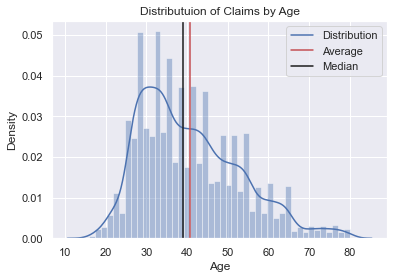

In [58]:
sns.distplot(fraud_data['Age'])
plt.axvline(x=fraud_data['Age'].mean(), color = 'r')
plt.axvline(x=fraud_data['Age'].median(), color = 'k')
plt.legend(['Distribution','Average', 'Median'])
plt.title('Distributuion of Claims by Age')

# Total Claims by Gender

In [36]:
claimsbygender = pd.DataFrame(fraud_data['Sex'].value_counts())
claimsbygender

,Sex
Male,12680
Female,2420


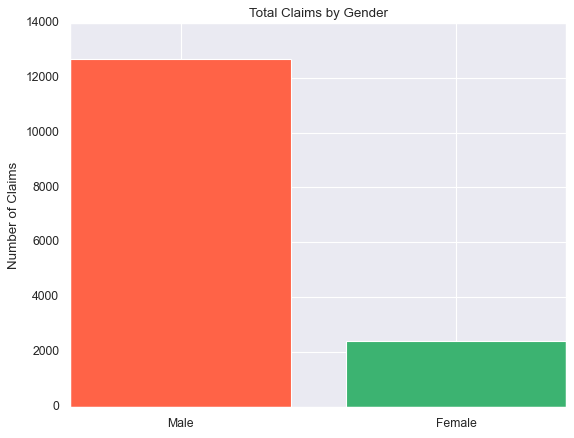

In [71]:
plt.bar(claimsbygender.index, claimsbygender.Sex, color = ['tomato', 'mediumseagreen'] )
plt.title("Total Claims by Gender")
plt.ylabel("Number of Claims")
plt.show()

# Total Claims by Marital Status

In [78]:
totalM = pd.DataFrame(fraud_data['MaritalStatus'].value_counts())
totalM.reset_index(inplace = True)
totalM = totalM.rename(columns = {'index': 'Marital Status', 'MaritalStatus': 'Count'})
totalM

,Marital Status,Count
0,Married,10625
1,Single,4364
2,Divorced,76
3,Widow,35


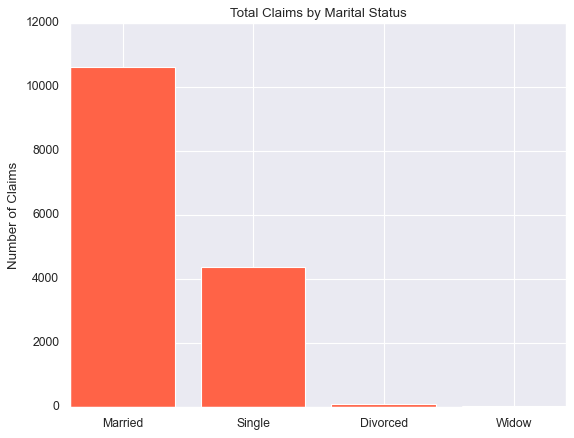

In [74]:
plt.bar(totalM.index, totalM.MaritalStatus, color = ['tomato'])
plt.title('Total Claims by Marital Status')
plt.ylabel('Number of Claims')
plt.show()

# Total Number of Frauds in the dataset

In [80]:
total_frauds = fraud_data['FraudFound_P'].sum()
total_frauds

892

In [81]:
legitimate_claims = fraud_data['FraudFound_P'].count() - total_frauds
legitimate_claims

14208

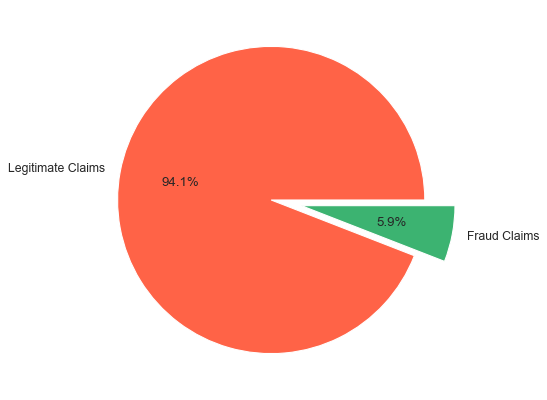

In [82]:
plt.pie(x=[legitimate_claims,total_frauds], labels=['Legitimate Claims','Fraud Claims'], colors=['tomato', 'mediumseagreen'], autopct="%1.1f%%", explode=[0,0.2])
plt.show()

# Frauds and Fraud Rates based on Gender

In [83]:
gender_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['Sex'])
gender_fraud_rates = pd.DataFrame(gender_frauds.sum()/gender_frauds.count()).reset_index()
display(gender_fraud_rates.style.format({'FraudFound_P':'{:,.2%}'}))
gender_frauds = pd.DataFrame(gender_frauds.sum())
gender_frauds

,Sex,FraudFound_P
0,Female,4.34%
1,Male,6.21%


,FraudFound_P
Sex,
Female,105
Male,787


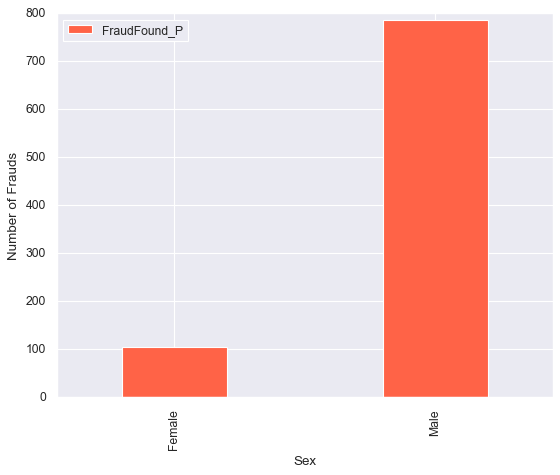

In [84]:
gender_frauds.plot.bar(color='tomato', width=0.4)
plt.ylabel('Number of Frauds')
plt.show()

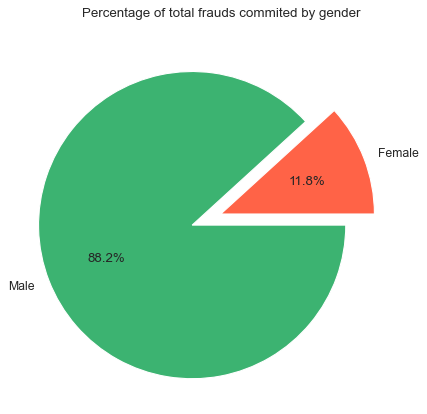

In [85]:
plt.pie(x=gender_frauds['FraudFound_P'], colors=['tomato','mediumseagreen'], explode=[0,0.2], labels=gender_frauds.index, autopct="%1.1f%%")
plt.title("Percentage of total frauds commited by gender")
plt.show()

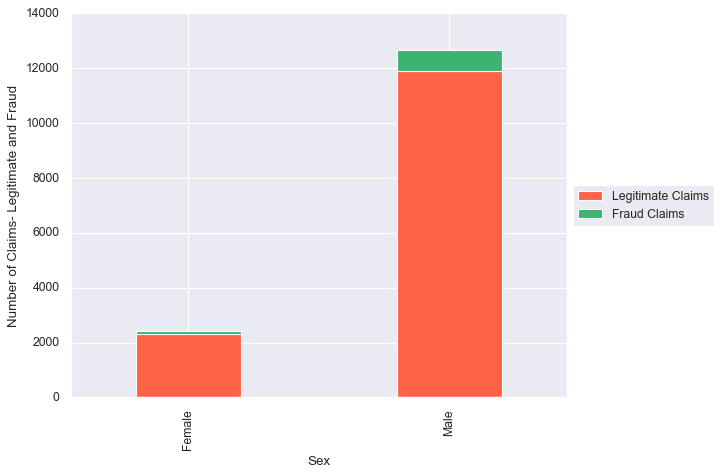

In [86]:
gender_based_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['Sex'])
gender_frauds = pd.DataFrame({'Legitimate Claims': gender_based_frauds.count() - gender_based_frauds.sum(), 'Fraud Claims': gender_based_frauds.sum()})
gender_frauds[['Legitimate Claims', 'Fraud Claims']].reset_index().plot.bar(x = 'Sex', stacked = True, color=['tomato','mediumseagreen'],width=0.4)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Number of Claims- Legitimate and Fraud')
plt.show()

# Frauds based on Car Brand and Gender

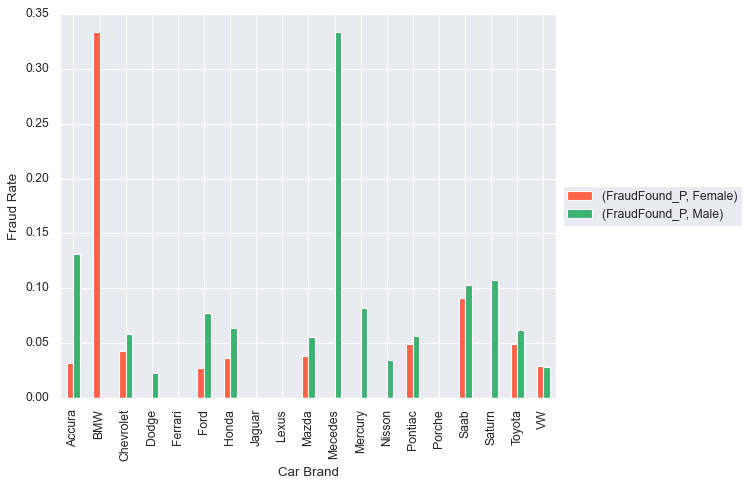

In [87]:
brand_and_gender_frauds = fraud_data[['FraudFound_P','Make','Sex']].groupby(['Make','Sex'])
brand_and_gender_frauds = pd.DataFrame(brand_and_gender_frauds.sum()/brand_and_gender_frauds.count())
brand_and_gender_frauds = brand_and_gender_frauds.unstack()
brand_and_gender_frauds = brand_and_gender_frauds.reset_index()
brand_and_gender_frauds.plot(kind='bar', color=['tomato', 'mediumseagreen'])
plt.xlabel('Car Brand')
plt.ylabel('Fraud Rate')
plt.xticks(np.arange(19), brand_and_gender_frauds['Make'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

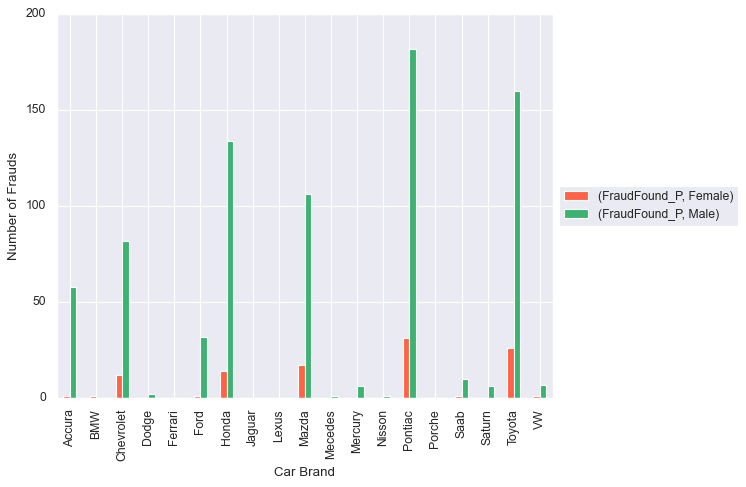

In [88]:
brand_and_gender_frauds = fraud_data[['FraudFound_P','Make','Sex']].groupby(['Make','Sex'])
brand_and_gender_frauds = pd.DataFrame(brand_and_gender_frauds.sum())
brand_and_gender_frauds = brand_and_gender_frauds.unstack()
brand_and_gender_frauds = brand_and_gender_frauds.reset_index()
brand_and_gender_frauds.plot(kind='bar', color=['tomato', 'mediumseagreen'])
plt.xlabel('Car Brand')
plt.ylabel('Number of Frauds')
plt.xticks(np.arange(19), brand_and_gender_frauds['Make'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Frauds based on Area of Accident

In [89]:
area_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['AccidentArea'])
area_frauds = pd.DataFrame(area_frauds.sum()).reset_index()
area_frauds

,AccidentArea,FraudFound_P
0,Rural,131
1,Urban,761


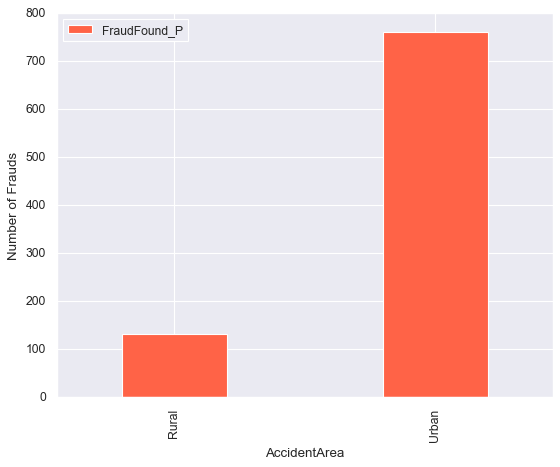

In [90]:
area_frauds.plot.bar(x="AccidentArea", color=['tomato','mediumseagreen'], width=0.4)
plt.ylabel('Number of Frauds')
plt.show()

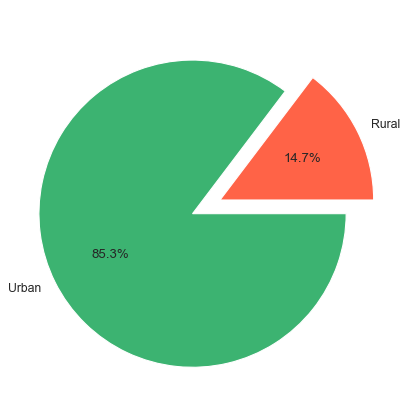

In [91]:
plt.pie(x=area_frauds['FraudFound_P'], autopct='%1.1f%%',labels=area_frauds['AccidentArea'], colors=['tomato','mediumseagreen'], explode=[0,0.2])
plt.show()

# Fraudulent Claims based on Area and Gender

In [155]:
totalclaims = pd.DataFrame(fraud_data['AccidentArea'].value_counts())
totalclaims

,AccidentArea
Urban,13554
Rural,1546


In [156]:
fraudclaims = pd.DataFrame(fraudcases['AccidentArea'].value_counts())
fraudclaims

,AccidentArea
Urban,761
Rural,131


In [92]:
area_and_gender_frauds = fraud_data[['FraudFound_P', 'AccidentArea', 'Sex']].groupby(['AccidentArea', 'Sex'])
area_and_gender_frauds_count = pd.DataFrame(area_and_gender_frauds.sum())
area_and_gender_frauds_count

FraudFound_P
AccidentArea Sex                 
Rural        Female            14
             Male             117
Urban        Female            91
             Male             670

In [93]:
area_and_gender_frauds_count = area_and_gender_frauds_count.unstack()
area_and_gender_frauds_count = area_and_gender_frauds_count.reset_index()
area_and_gender_frauds_count

AccidentArea FraudFound_P     
Sex                    Female Male
0          Rural           14  117
1          Urban           91  670

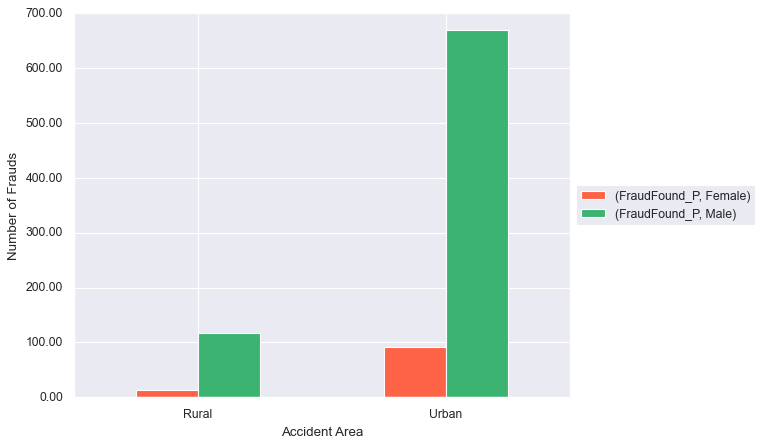

In [94]:
area_and_gender_frauds_count.plot(kind='bar', color=['tomato','mediumseagreen'])
plt.ylabel('Number of Frauds')
plt.xlabel('Accident Area')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.gca().xaxis.set_tick_params(rotation=0)
plt.xticks(np.arange(2), area_and_gender_frauds_count['AccidentArea'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Frauds Based on Age Groups

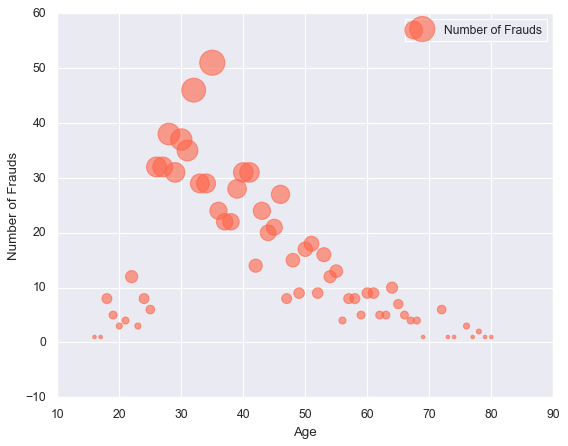

In [95]:
age_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['Age'])
age_frauds = pd.DataFrame(age_frauds.sum()).reset_index()
age_frauds
plt.scatter(x=age_frauds['Age'], y=age_frauds['FraudFound_P'], color='tomato', label='Number of Frauds',alpha=0.6, s=age_frauds['FraudFound_P']*10)
plt.xlabel('Age')
plt.ylabel('Number of Frauds')
plt.legend()
plt.rcParams["figure.figsize"]=[16,20]
plt.show()

In [96]:
fraud_data['Age_Range'] = pd.cut(fraud_data['Age'], bins=[15,25,35,45,55,65,75,85])
fraud_data

/var/folders/k_/r8z8sp611sz5bcld464g4gjr0000gn/T/ipykernel_14633/2493787854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['Age_Range'] = pd.cut(fraud_data['Age'], bins=[15,25,35,45,55,65,75,85])


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,NumberOfCars,Year,BasePolicy,Age_Range
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,more than 30,none,3 years,26 to 30,No,No,3 to 4,1994,Liability,"(15, 25]"
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,more than 30,none,6 years,31 to 35,Yes,No,1 vehicle,1994,Collision,"(25, 35]"
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,more than 30,1,7 years,41 to 50,No,No,1 vehicle,1994,Collision,"(45, 55]"
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 30,1,more than 7,51 to 65,Yes,No,1 vehicle,1994,Liability,"(55, 65]"
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,more than 30,none,5 years,31 to 35,No,No,1 vehicle,1994,Collision,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,more than 30,2 to 4,6 years,31 to 35,No,No,1 vehicle,1996,Collision,"(25, 35]"
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,more than 30,more than 4,6 years,31 to 35,No,No,3 to 4,1996,Liability,"(25, 35]"
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,more than 30,more than 4,5 years,26 to 30,No,No,1 vehicle,1996,Collision,"(15, 25]"
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,more than 30,none,2 years,31 to 35,No,No,1 vehicle,1996,All Perils,"(25, 35]"


In [100]:
age_range_frauds = fraud_data.groupby('Age_Range')['FraudFound_P']
age_range_frauds = pd.DataFrame(age_range_frauds.sum()).reset_index()
age_range_frauds['% of Total'] = age_range_frauds['FraudFound_P']/age_range_frauds['FraudFound_P'].sum()
display(age_range_frauds.style.format({'% of Total':'{:,.2%}'}))


,Age_Range,FraudFound_P,% of Total
0,"(15, 25]",51,5.72%
1,"(25, 35]",360,40.36%
2,"(35, 45]",237,26.57%
3,"(45, 55]",144,16.14%
4,"(55, 65]",70,7.85%
5,"(65, 75]",22,2.47%
6,"(75, 85]",8,0.90%


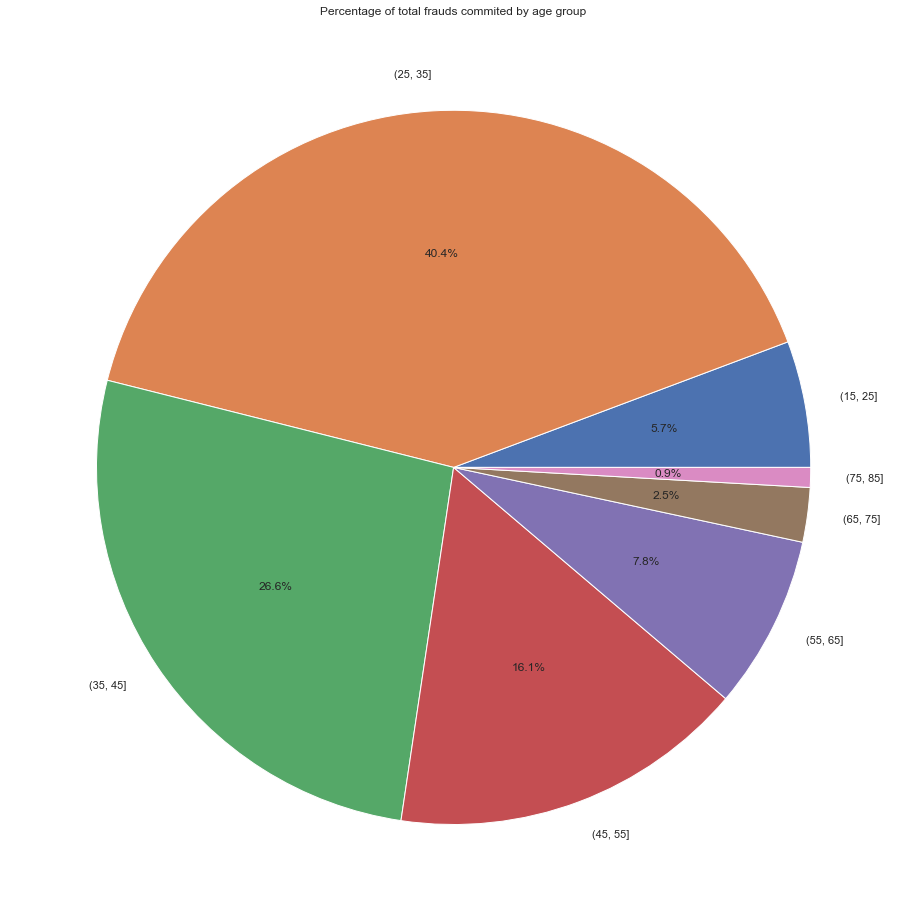

In [29]:
plt.pie(x=age_range_frauds['FraudFound_P'], labels=age_range_frauds['Age_Range'], autopct="%1.1f%%")
plt.rcParams["figure.figsize"]=[40,40]
plt.title('Percentage of total frauds commited by age group')
plt.show()

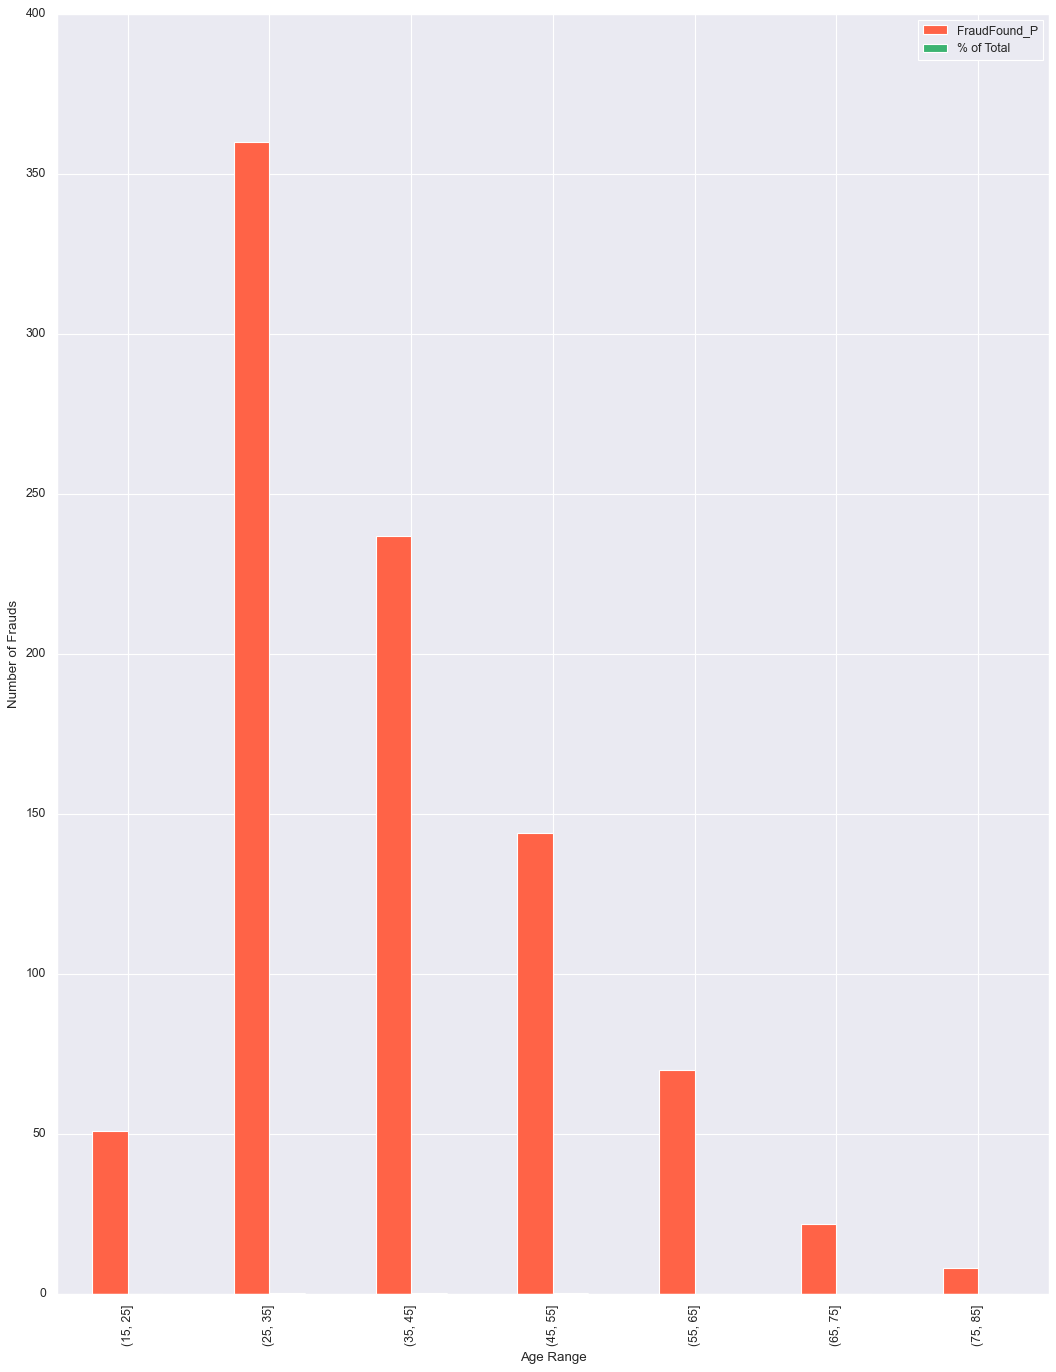

In [102]:
age_range_frauds.plot.bar(x='Age_Range', color=['tomato','mediumseagreen'])
plt.ylabel('Number of Frauds')
plt.xlabel('Age Range')
plt.show()

# Frauds based on Gender and Age Range

In [103]:
age_and_gender = fraud_data[['FraudFound_P','Age_Range','Sex']].groupby(['Age_Range','Sex'])
age_and_gender_frauds = pd.DataFrame(age_and_gender.sum('FraudFound_P'))
age_and_gender_frauds = age_and_gender_frauds.unstack()
age_and_gender_frauds = age_and_gender_frauds.reset_index()
age_and_gender_frauds

Age_Range FraudFound_P     
Sex                 Female Male
0    (15, 25]            4   47
1    (25, 35]           58  302
2    (35, 45]           23  214
3    (45, 55]           16  128
4    (55, 65]            3   67
5    (65, 75]            0   22
6    (75, 85]            1    7

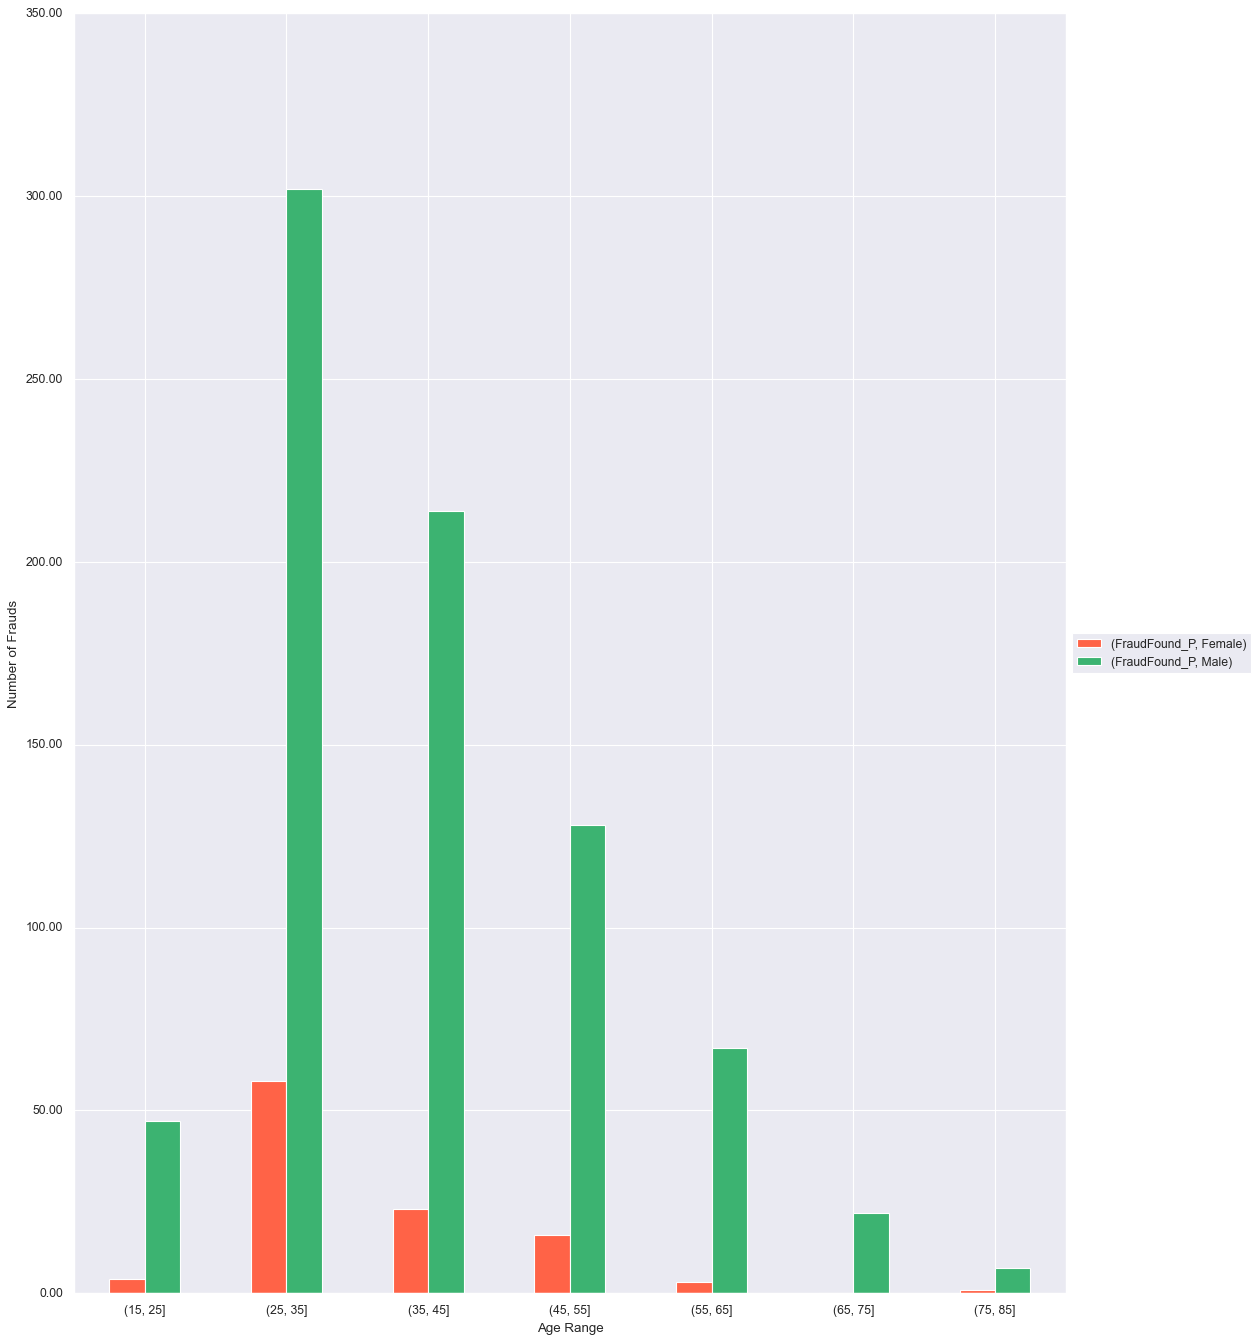

In [104]:
age_and_gender_frauds.plot(kind='bar', color=['tomato','mediumseagreen'])
plt.ylabel('Number of Frauds')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.gca().xaxis.set_tick_params(rotation=0)
plt.xticks(np.arange(7), age_and_gender_frauds['Age_Range'])
plt.ylabel('Number of Frauds')
plt.xlabel('Age Range')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Frauds based on Area, Gender and Age Group

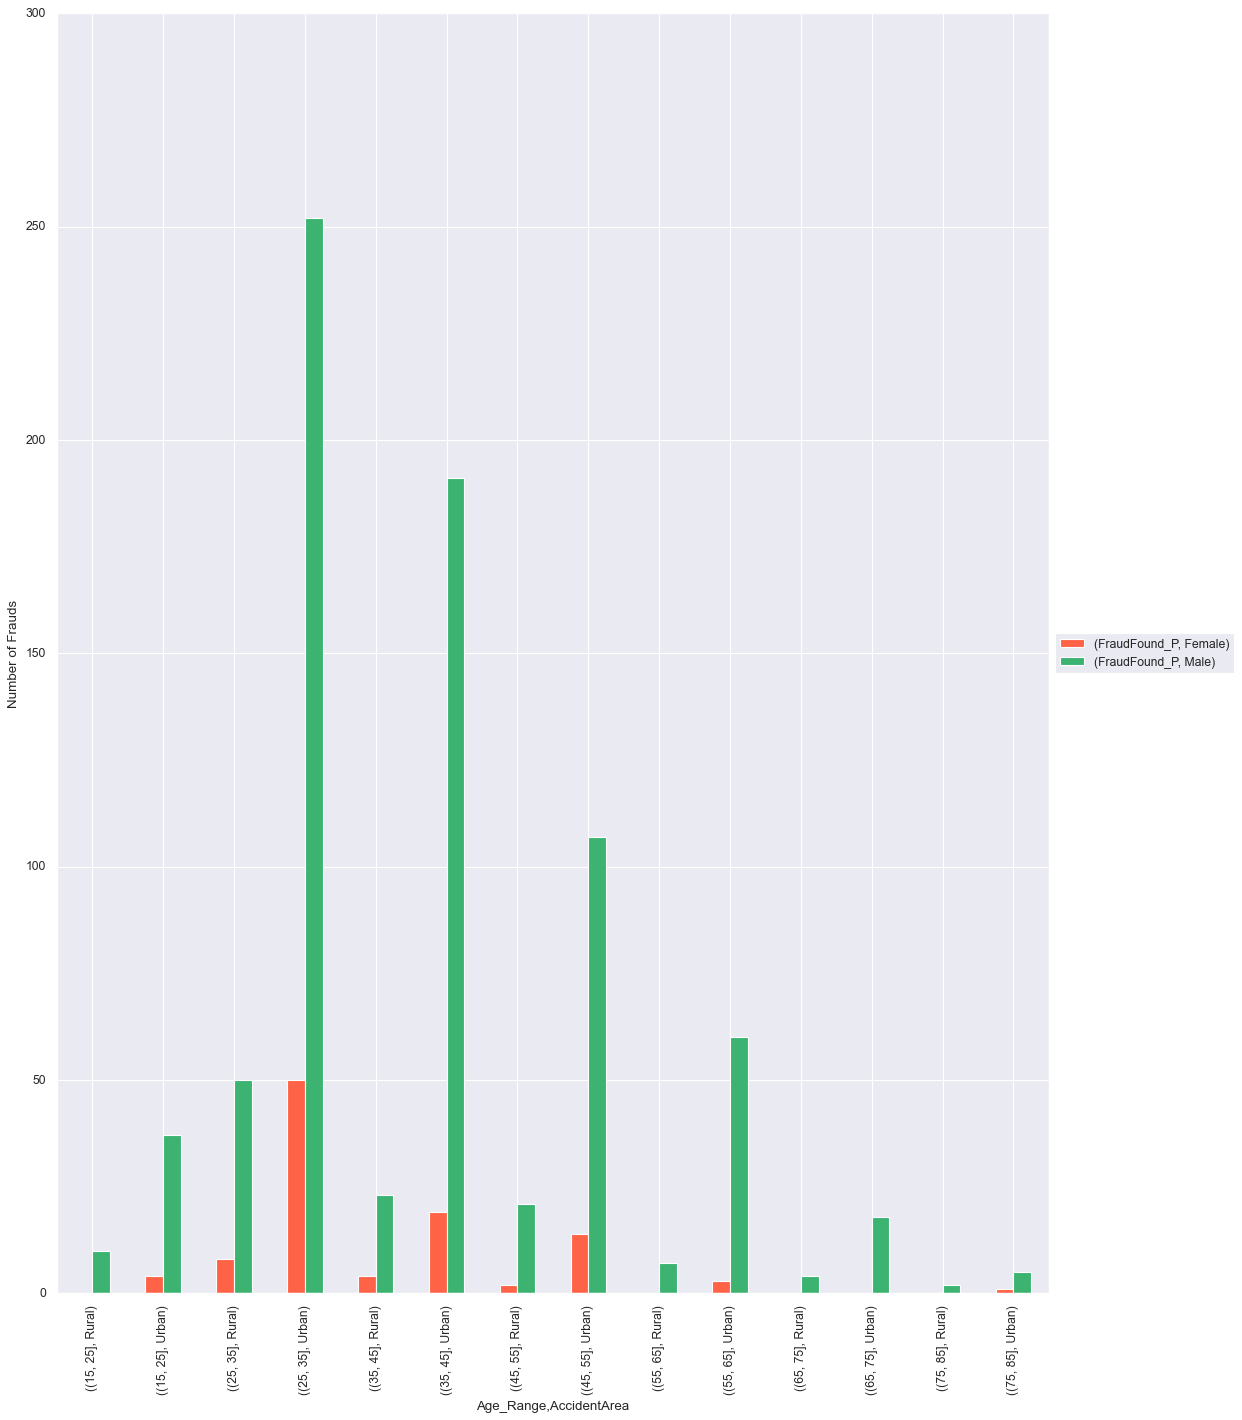

In [105]:
gender_area_age_frauds = fraud_data[['FraudFound_P','Sex','AccidentArea','Age_Range']].groupby(['Age_Range','AccidentArea','Sex'])
gender_area_age_frauds = pd.DataFrame(gender_area_age_frauds.sum().unstack())
gender_area_age_frauds.plot.bar(color=['tomato','mediumseagreen'])
plt.legend(loc='center left', bbox_to_anchor=[1,0.5])
plt.ylabel('Number of Frauds')
plt.show()

# Frauds based on Marital Status

In [106]:
marital_status_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['MaritalStatus'])
marital_status_frauds.sum()
marital_status_frauds = pd.DataFrame(marital_status_frauds.sum())
marital_status_frauds = marital_status_frauds.sort_values('FraudFound_P', ascending=False)
marital_status_frauds

,FraudFound_P
MaritalStatus,
Married,639
Single,247
Divorced,3
Widow,3


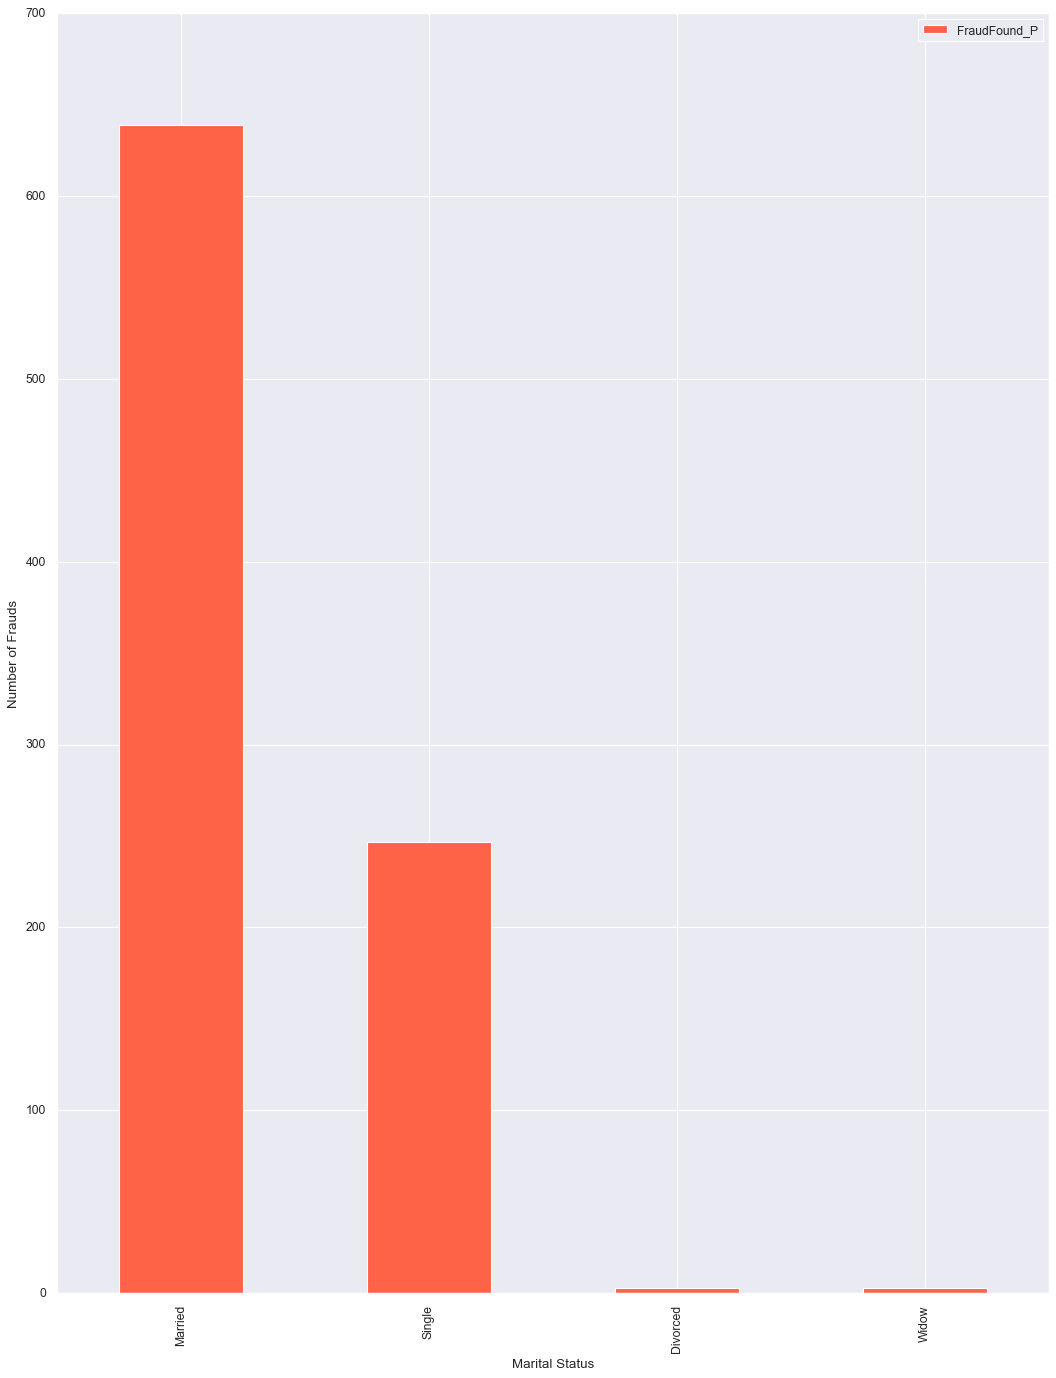

In [107]:
marital_status_frauds.plot.bar(color='tomato')
plt.ylabel('Number of Frauds')
plt.xlabel('Marital Status')
plt.show()

# Frauds based on Marital Status and gender

In [108]:
gender_and_marital_frauds = fraud_data[['FraudFound_P','MaritalStatus','Sex']].groupby(['MaritalStatus','Sex'])
gender_and_marital_frauds = gender_and_marital_frauds.sum().unstack()
gender_and_marital_frauds.reset_index(inplace=True)
gender_and_marital_frauds

MaritalStatus FraudFound_P     
Sex                     Female Male
0        Divorced            1    2
1         Married           64  575
2          Single           38  209
3           Widow            2    1

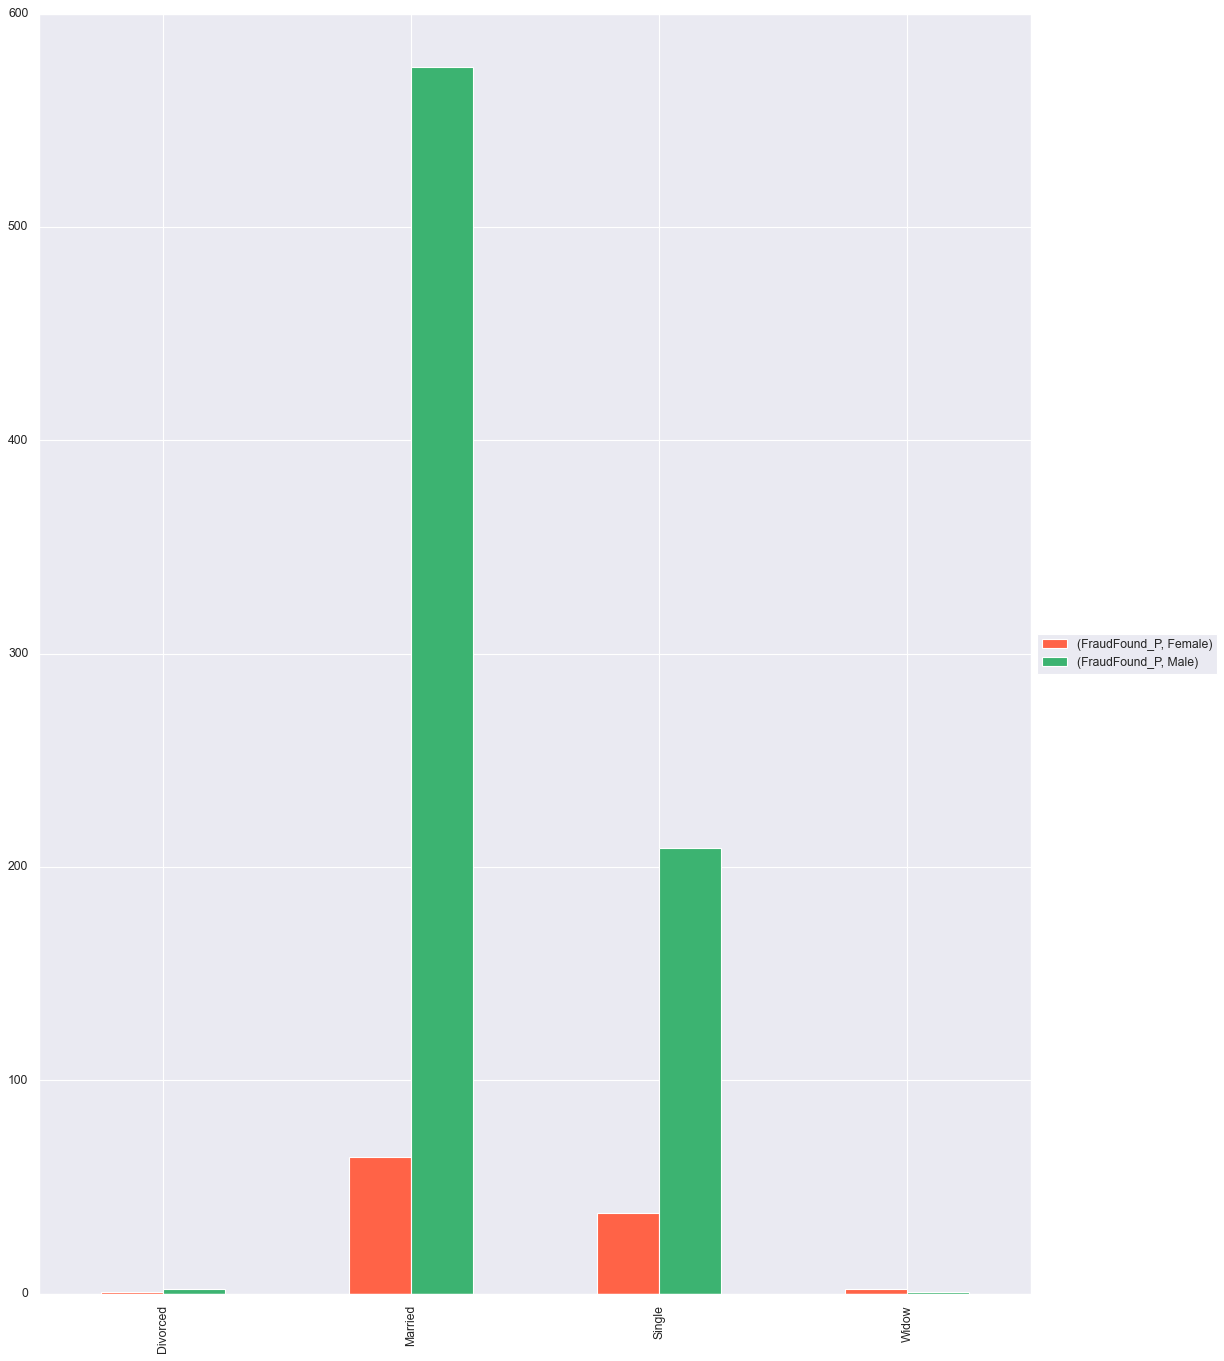

In [109]:
gender_and_marital_frauds.plot(kind='bar', color=['tomato','mediumseagreen'])
plt.xticks(np.arange(4), gender_and_marital_frauds['MaritalStatus'])
plt.legend(loc='center left', bbox_to_anchor=[1,0.5])
plt.show()

# Frauds based on Marital Status and Age

In [110]:
age_and_marital_frauds = fraud_data[['FraudFound_P','MaritalStatus','Age_Range']].groupby(['Age_Range','MaritalStatus'])
age_and_marital_frauds = age_and_marital_frauds.sum().unstack()
age_and_marital_frauds.reset_index(inplace=True)
age_and_marital_frauds

Age_Range FraudFound_P                     
MaritalStatus               Divorced Married Single Widow
0              (15, 25]            0       4     47     0
1              (25, 35]            1     208    149     2
2              (35, 45]            1     203     32     1
3              (45, 55]            1     133     10     0
4              (55, 65]            0      65      5     0
5              (65, 75]            0      18      4     0
6              (75, 85]            0       8      0     0

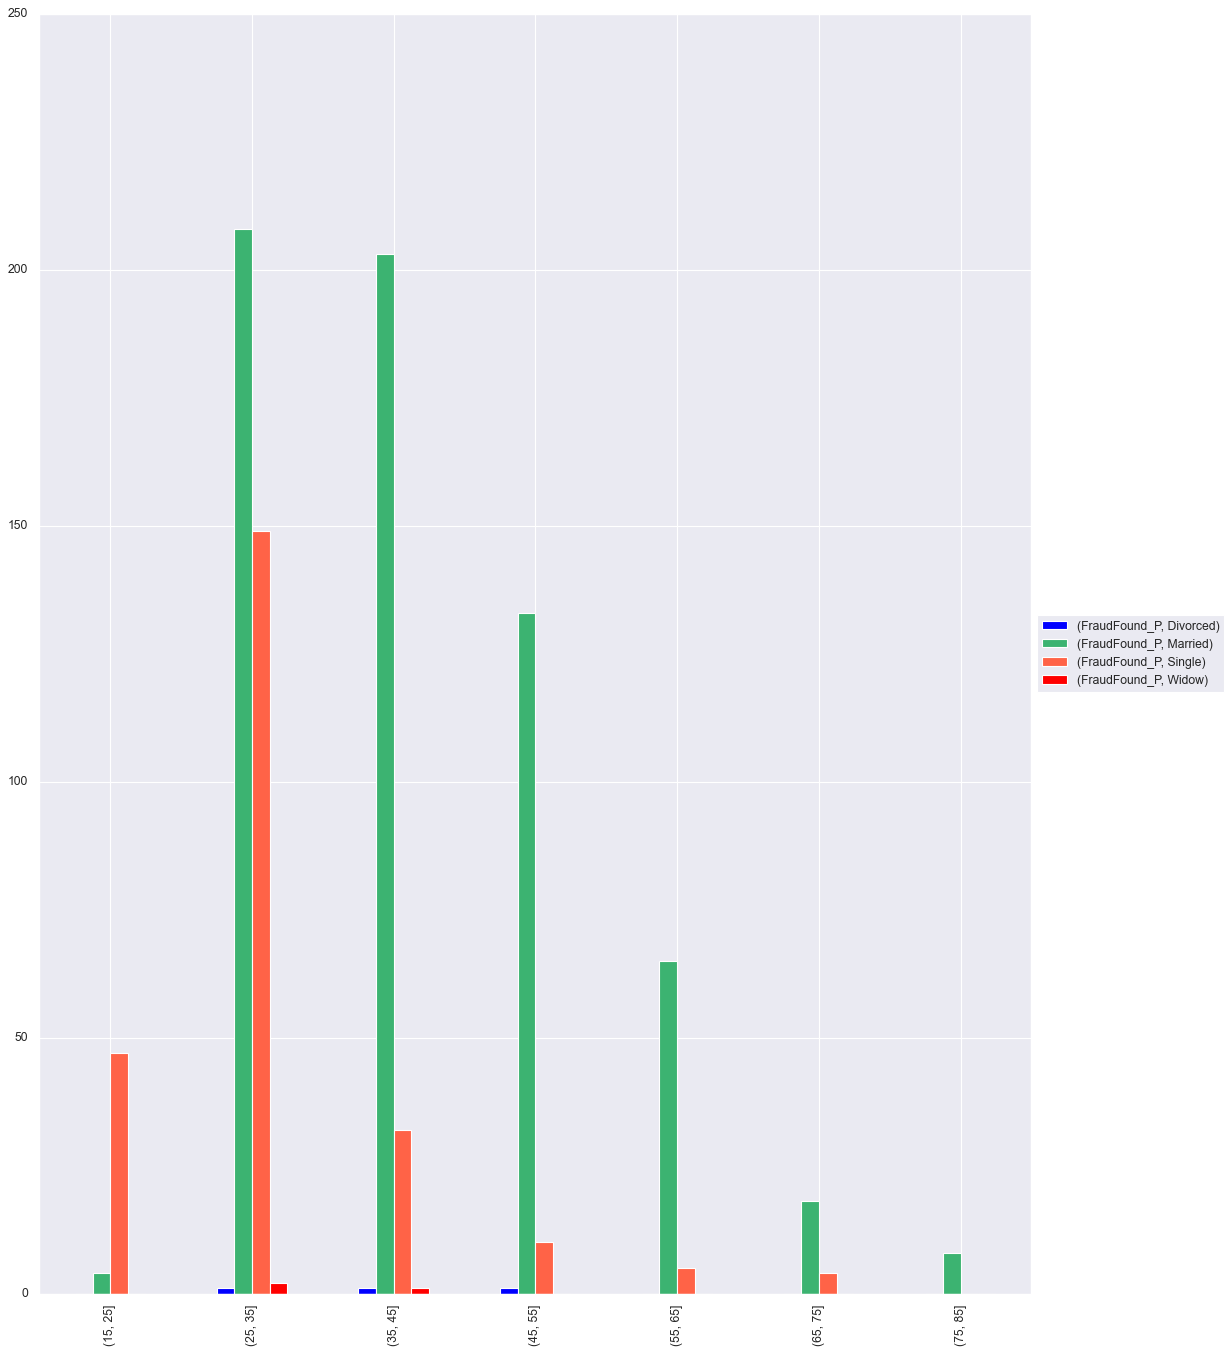

In [111]:
age_and_marital_frauds.plot(kind='bar', color=['blue','mediumseagreen','tomato','red'])
plt.xticks(np.arange(7), age_and_marital_frauds['Age_Range'])
plt.legend(loc='center left', bbox_to_anchor=[1,0.5])
plt.show()

# Frauds and Fraud Rates based on Car Brand

In [179]:
car_make = pd.DataFrame(fraudcases.Make.value_counts())
car_make.reset_index(inplace = True)
car_make['% of Total'] = car_make.Make / car_make.Make.sum()
car_make = car_make.rename(columns = {'Make': 'Count', 'index': 'Make'})
display(car_make.style.format({'% of Total':'{:,.2%}'}))

,Make,Count,% of Total
0,Pontiac,213,23.88%
1,Toyota,186,20.85%
2,Honda,148,16.59%
3,Mazda,123,13.79%
4,Chevrolet,94,10.54%
5,Accura,59,6.61%
6,Ford,33,3.70%
7,Saab,11,1.23%
8,VW,8,0.90%
9,Saturn,6,0.67%


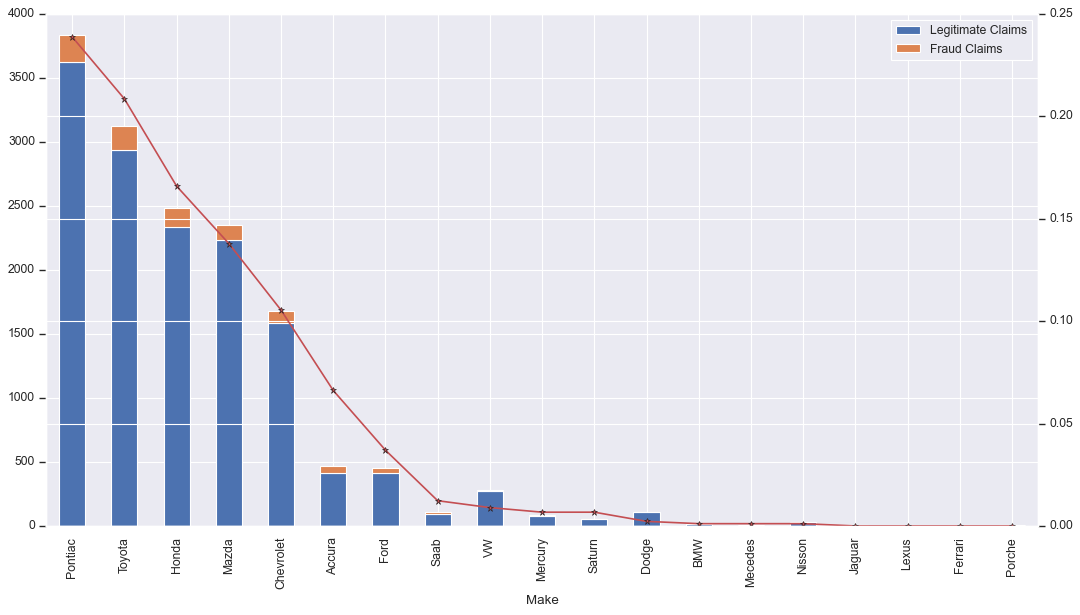

In [113]:
car_make_fraud_rate = pd.DataFrame({'Fraud Rate': car_make.sum()/fraud_data['FraudFound_P'].sum(), 'Legitimate Claims': car_make.count() - car_make.sum(), 'Fraud Claims': car_make.sum()})
car_make_fraud_rate = car_make_fraud_rate.sort_values('Fraud Rate', ascending=False)
car_make_fraud_ratefig, ax = plt.subplots(figsize=(16,8))
ax2 = ax.twinx()
car_make_fraud_rate[['Legitimate Claims', 'Fraud Claims']].reset_index().plot.bar(x = 'Make', stacked = True ,ax=ax)
car_make_fraud_rate['Fraud Rate'].plot(ax=ax2, style='r*-')
plt.show()


# Fraud Numbers and Rates based on Policy Type (Third Party or Policy Holder)

,Fault,FraudFound_P
0,Policy Holder,7.81%
1,Third Party,0.89%


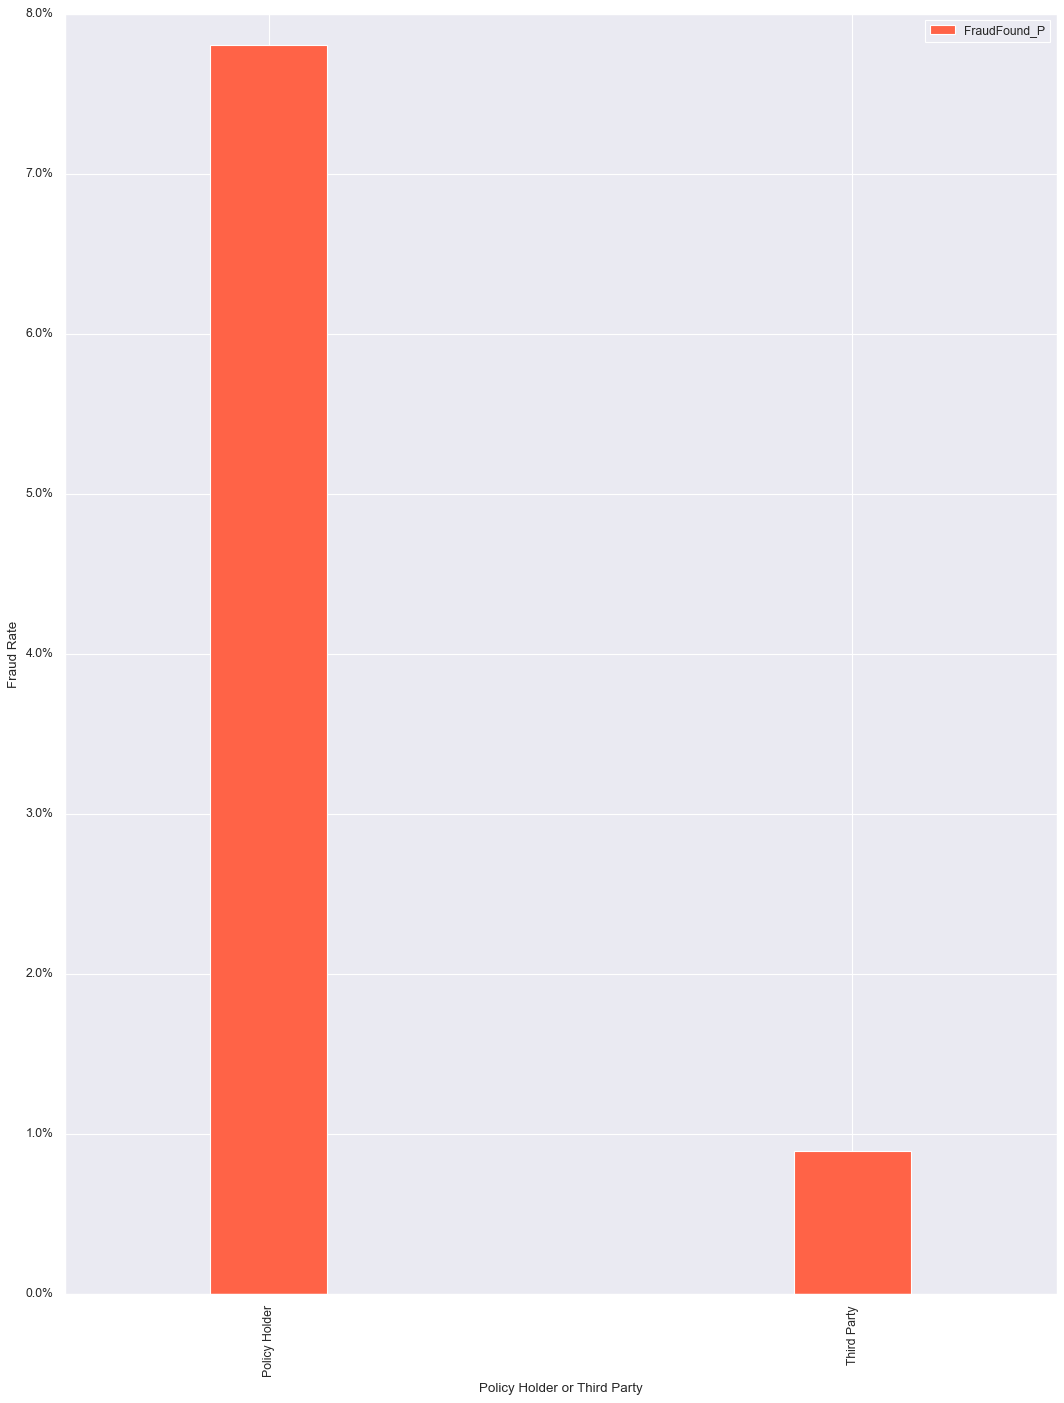

In [114]:
policy_fault_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['Fault'])
policy_fault_frauds_rate = pd.DataFrame(policy_fault_frauds.sum()/policy_fault_frauds.count())
policy_fault_frauds_rate.reset_index(inplace=True)
display(policy_fault_frauds_rate.style.format({'FraudFound_P':'{:,.2%}'}))
policy_fault_frauds_rate.plot.bar(x="Fault", color='tomato', width=0.2)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.xlabel('Policy Holder or Third Party')
plt.ylabel('Fraud Rate')
plt.show()

In [115]:
policy_fault_frauds = pd.DataFrame(policy_fault_frauds.sum()).reset_index()
policy_fault_frauds

,Fault,FraudFound_P
0,Policy Holder,855
1,Third Party,37


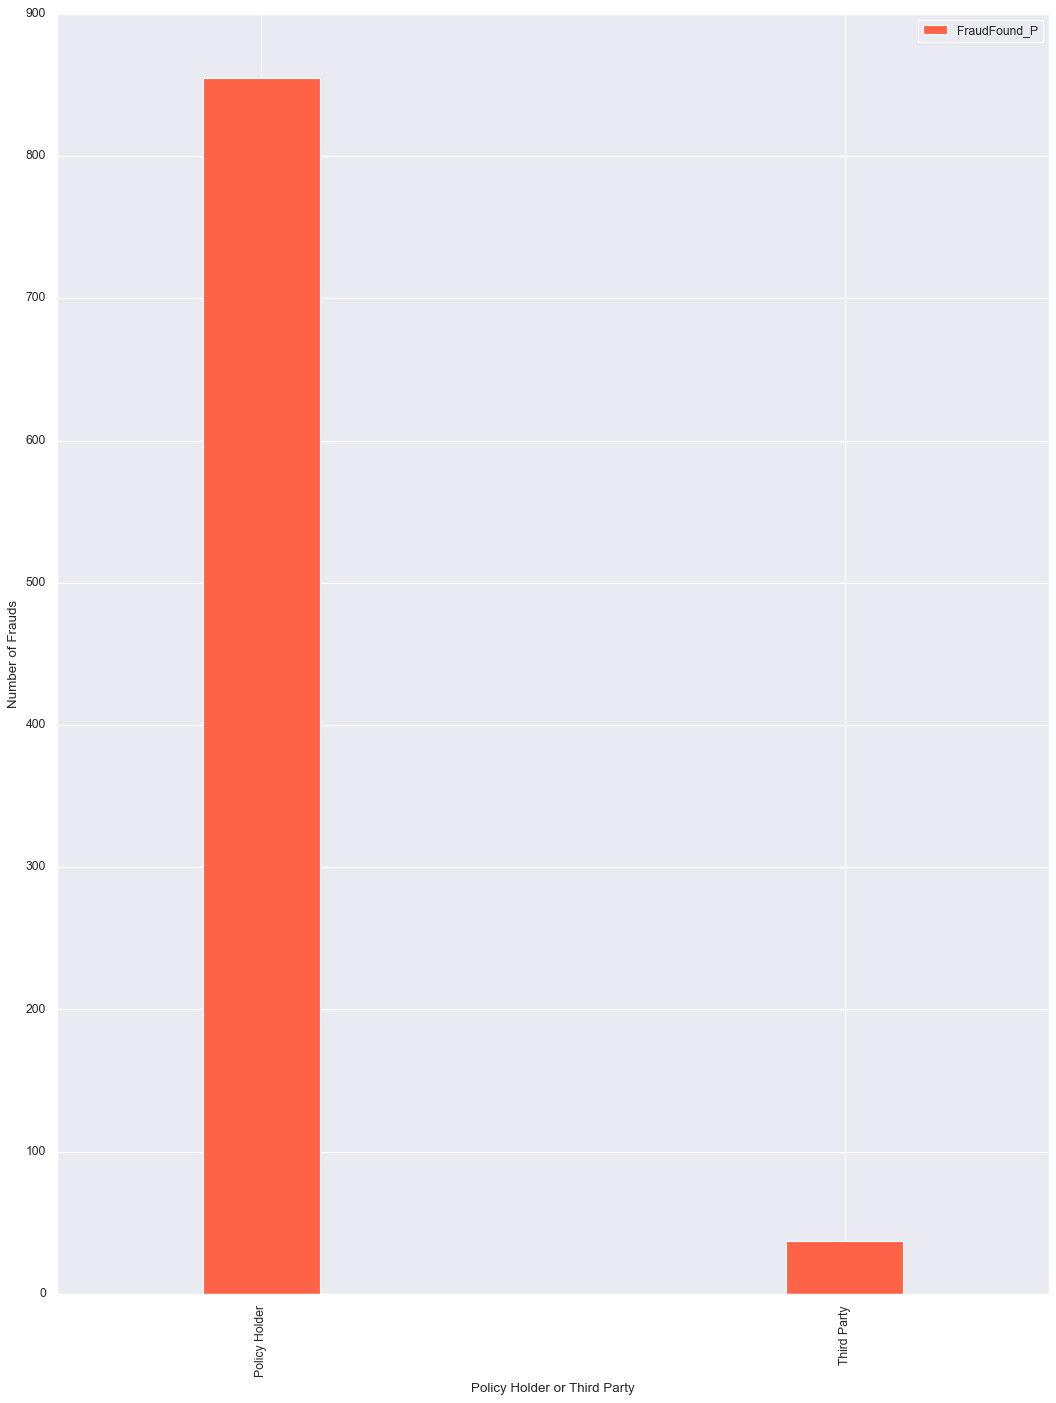

In [116]:
policy_fault_frauds.plot.bar(x="Fault", color='tomato', width=0.2)
plt.xlabel('Policy Holder or Third Party')
plt.ylabel('Number of Frauds')
plt.show()

# Frauds based on Vehicle category

In [117]:
vehicle_category_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['VehicleCategory'])
vehicle_category_frauds = pd.DataFrame(vehicle_category_frauds.sum())
vehicle_category_frauds.reset_index(inplace=True)
vehicle_category_frauds

,VehicleCategory,FraudFound_P
0,Sedan,767
1,Sport,83
2,Utility,42


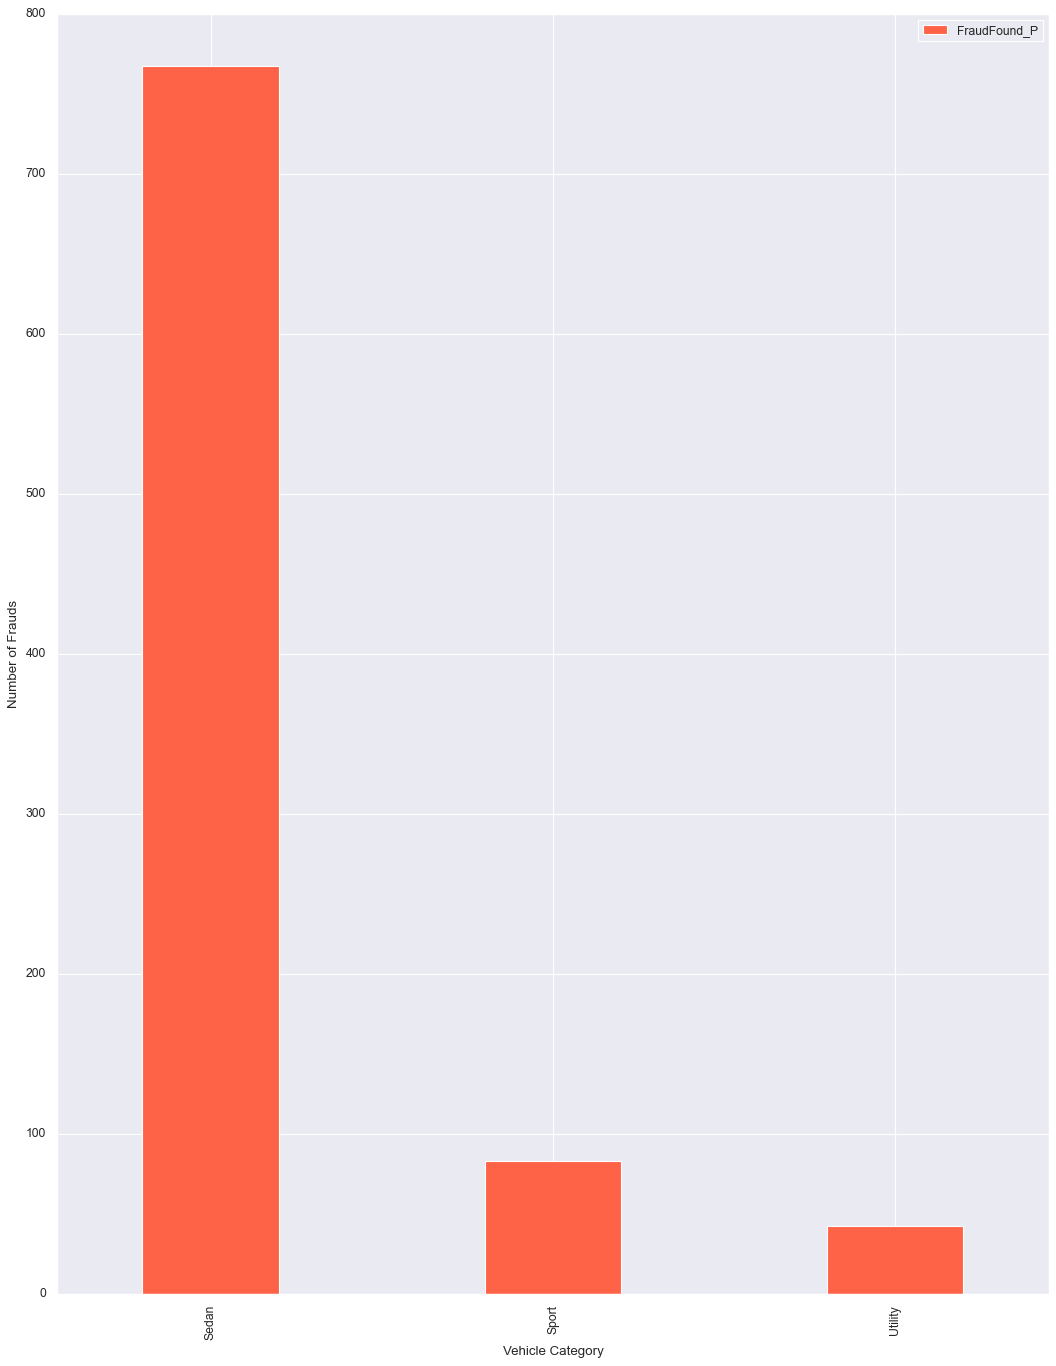

In [118]:
vehicle_category_frauds.plot.bar(x="VehicleCategory", color='tomato', width=0.4)
plt.ylabel('Number of Frauds')
plt.xlabel('Vehicle Category')
plt.show()

# Frauds based on Vehicle Price

,VehiclePrice,FraudFound_P
0,20000 to 29000,5.21%
1,30000 to 39000,4.95%
2,40000 to 59000,6.72%
3,60000 to 69000,4.60%
4,less than 20000,9.41%
5,more than 69000,8.56%


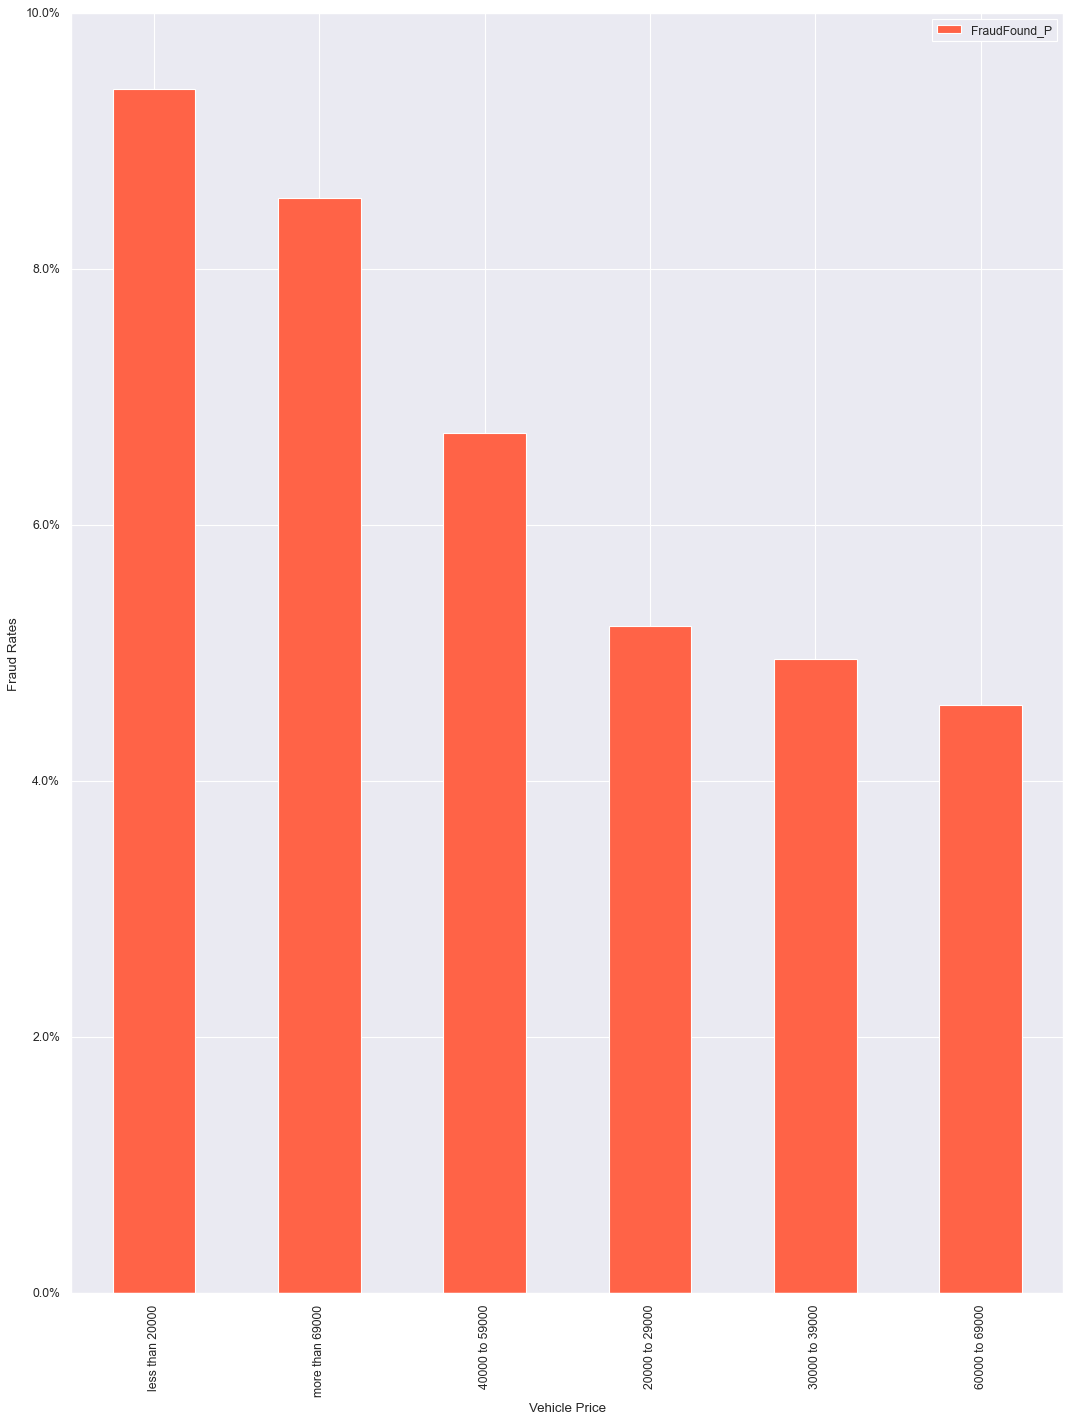

In [136]:
vehicle_price_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['VehiclePrice'])
vehicle_price_fraud_rates = pd.DataFrame(vehicle_price_frauds.sum()/vehicle_price_frauds.count()).reset_index()
display(vehicle_price_fraud_rates.style.format({'FraudFound_P':'{:,.2%}'}))
vehicle_price_fraud_rates = vehicle_price_fraud_rates.sort_values("FraudFound_P", ascending=False)
vehicle_price_fraud_rates.plot.bar(x='VehiclePrice', color='tomato')
plt.ylabel('Fraud Rates')
plt.xlabel('Vehicle Price')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.show()

In [143]:
fraudbyprice = pd.DataFrame(fraudcases['VehiclePrice'].value_counts())
fraudbyprice.reset_index(inplace = True)
fraudbyprice = fraudbyprice.rename(columns = {'VehiclePrice': 'Count', 'index':'VehiclePrice'})
fraudbyprice

,VehiclePrice,Count
0,20000 to 29000,421
1,30000 to 39000,175
2,more than 69000,158
3,less than 20000,103
4,40000 to 59000,31
5,60000 to 69000,4


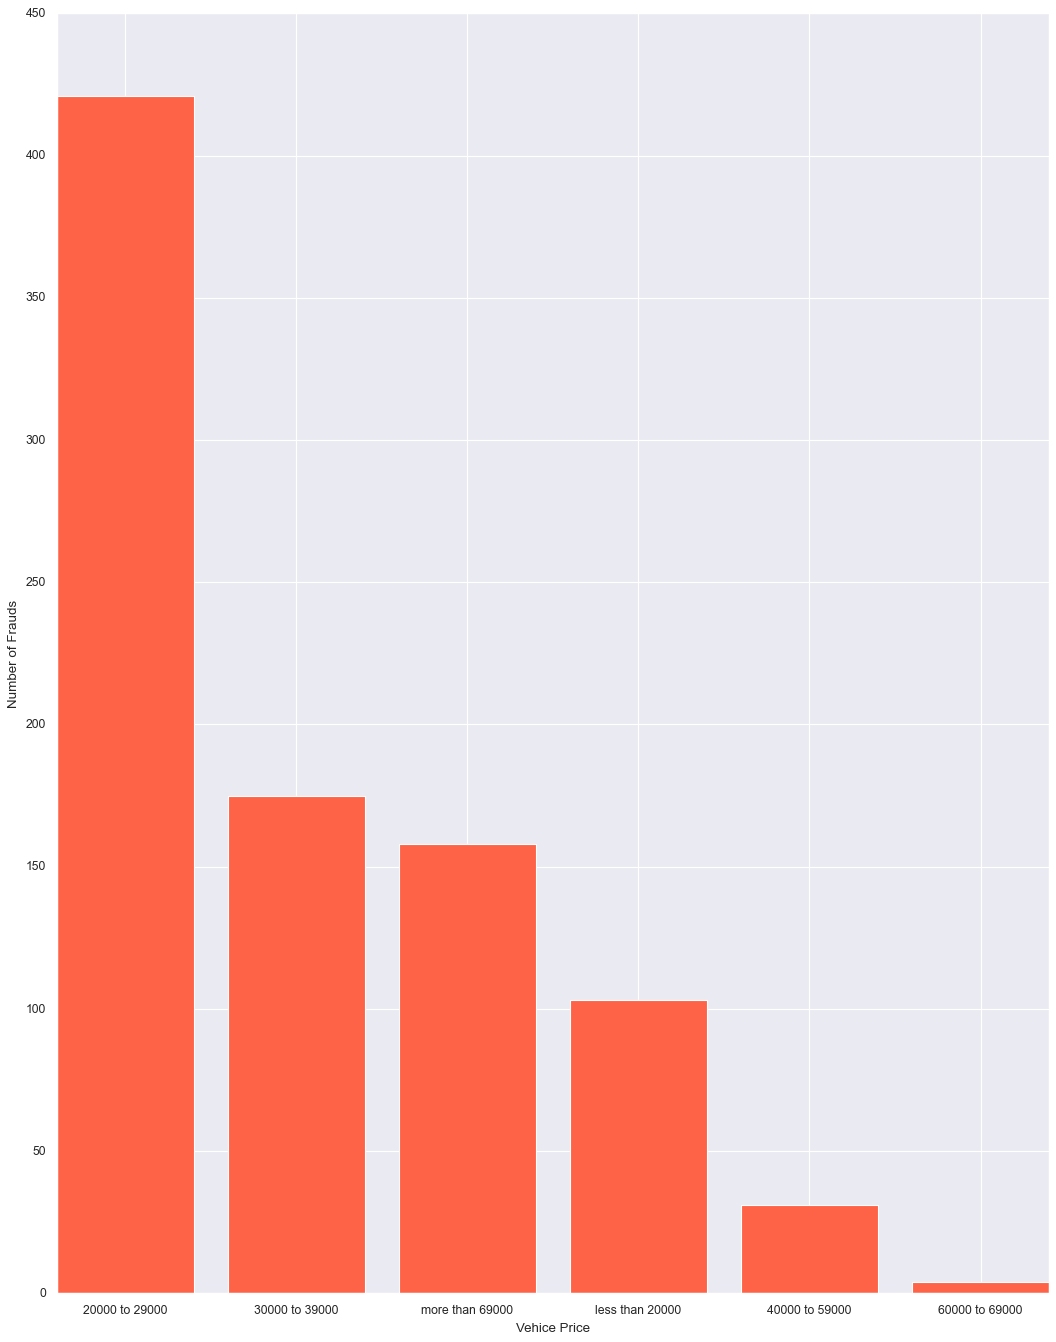

In [144]:
plt.bar(fraudbyprice['VehiclePrice'], fraudbyprice['Count'], color='tomato')
plt.ylabel('Number of Frauds')
plt.xlabel('Vehice Price')
plt.show()

# Frauds based on Vehicle Age

In [152]:
ageofvehicle = pd.DataFrame(fraudcases['AgeOfVehicle'].value_counts())
ageofvehicle.reset_index(inplace = True)
ageofvehicle = ageofvehicle.rename(columns = {'index': 'Age of Vehicle', 'AgeOfVehicle': 'Count'})
ageofvehicle

,Age of Vehicle,Count
0,7 years,325
1,6 years,228
2,more than 7,206
3,5 years,95
4,4 years,21
5,3 years,13
6,2 years,3
7,new,1


In [153]:
agevagesex = pd.DataFrame(fraudcases[['Age', 'AgeOfVehicle', 'Sex']].value_counts())
agevagesex.reset_index(inplace = True)
agevagesex = agevagesex.rename(columns = {0: "Count"})
agevagesex.head(10)

,Age,AgeOfVehicle,Sex,Count
0,32,6 years,Male,23
1,35,6 years,Male,21
2,30,6 years,Male,20
3,41,7 years,Male,19
4,35,7 years,Male,19
5,36,7 years,Male,18
6,39,7 years,Male,18
7,27,6 years,Male,16
8,31,6 years,Male,14
9,26,6 years,Male,14


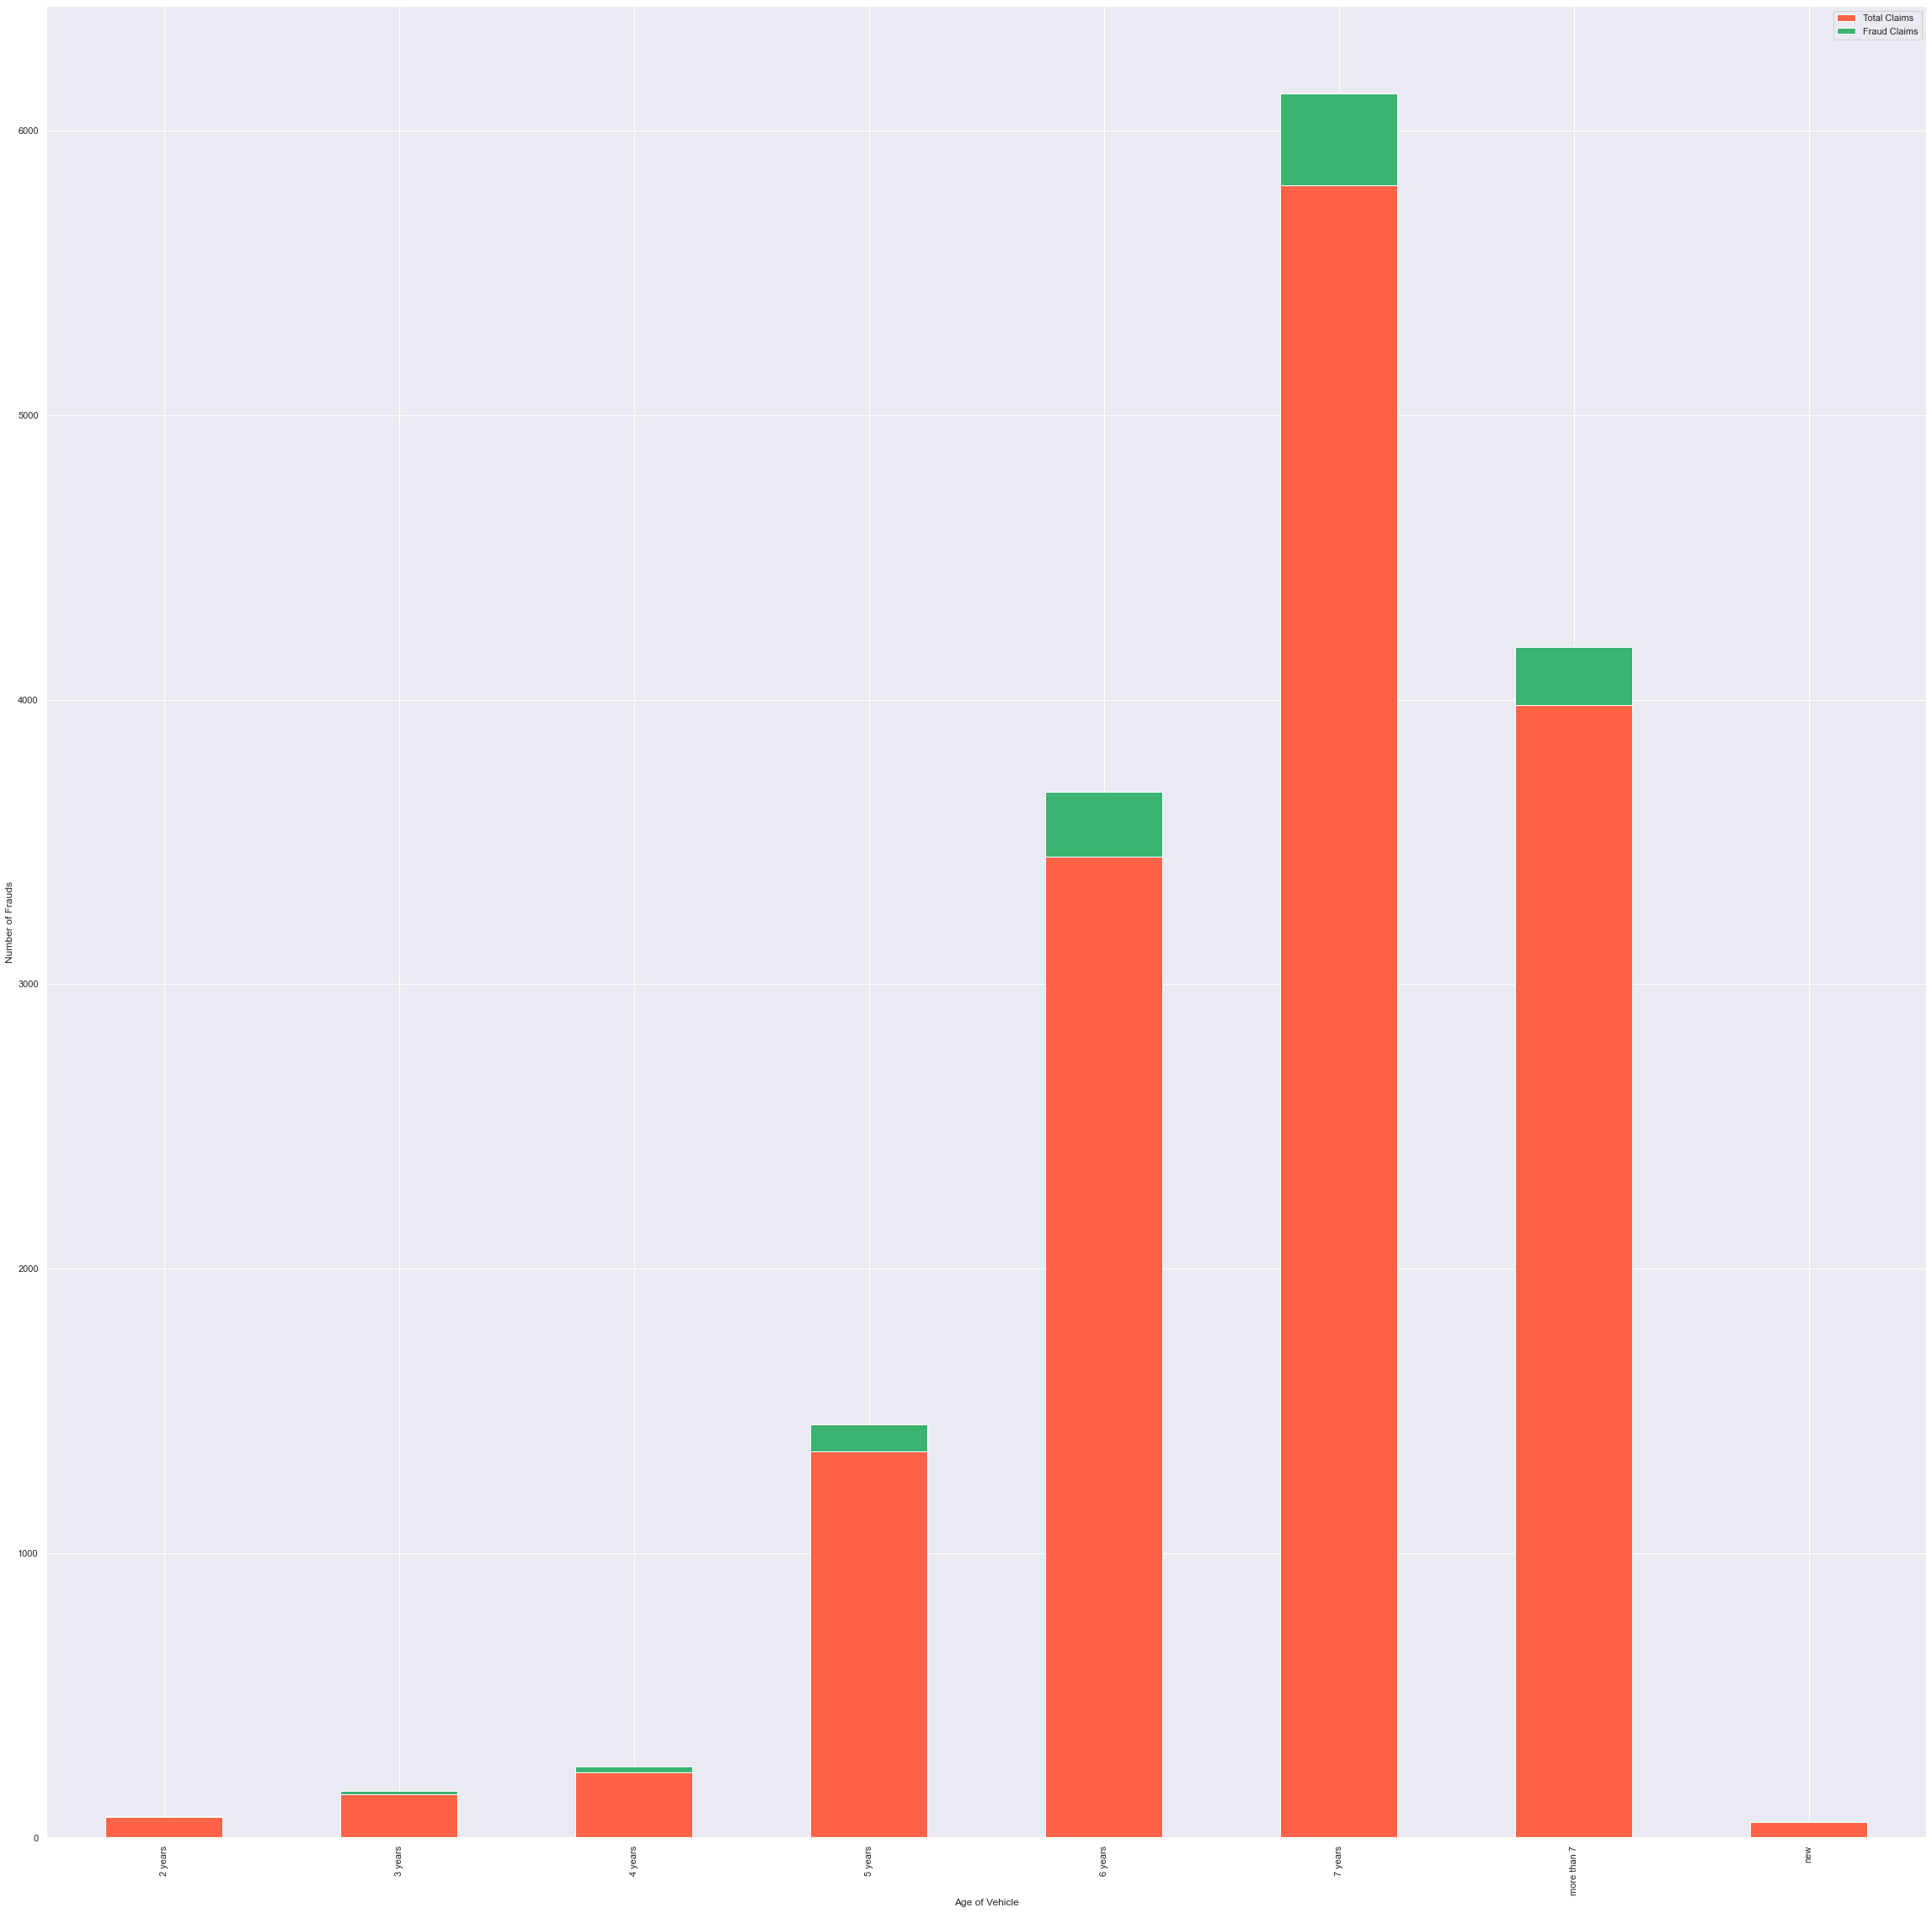

In [49]:
age_of_vehicle_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['AgeOfVehicle'])
age_of_vehicle_total_claims = pd.DataFrame(age_of_vehicle_frauds.count()).rename(columns={'FraudFound_P':'Total Claims'})
age_of_vehicle_frauds = pd.DataFrame(age_of_vehicle_frauds.sum()).rename(columns={'FraudFound_P':'Fraud Claims'})

claims_based_on_age = pd.concat([age_of_vehicle_total_claims,age_of_vehicle_frauds],axis=1, join='inner')
claims_based_on_age.reset_index(inplace=True)
claims_based_on_age.plot.bar(x='AgeOfVehicle', stacked=True, color=['tomato','mediumseagreen'])
plt.xlabel('Age of Vehicle')
plt.ylabel('Number of Frauds')
plt.show()

# Frauds based on Policy Coverage

,BasePolicy,FraudFound_P
0,All Perils,9.85%
1,Collision,7.30%
2,Liability,0.72%


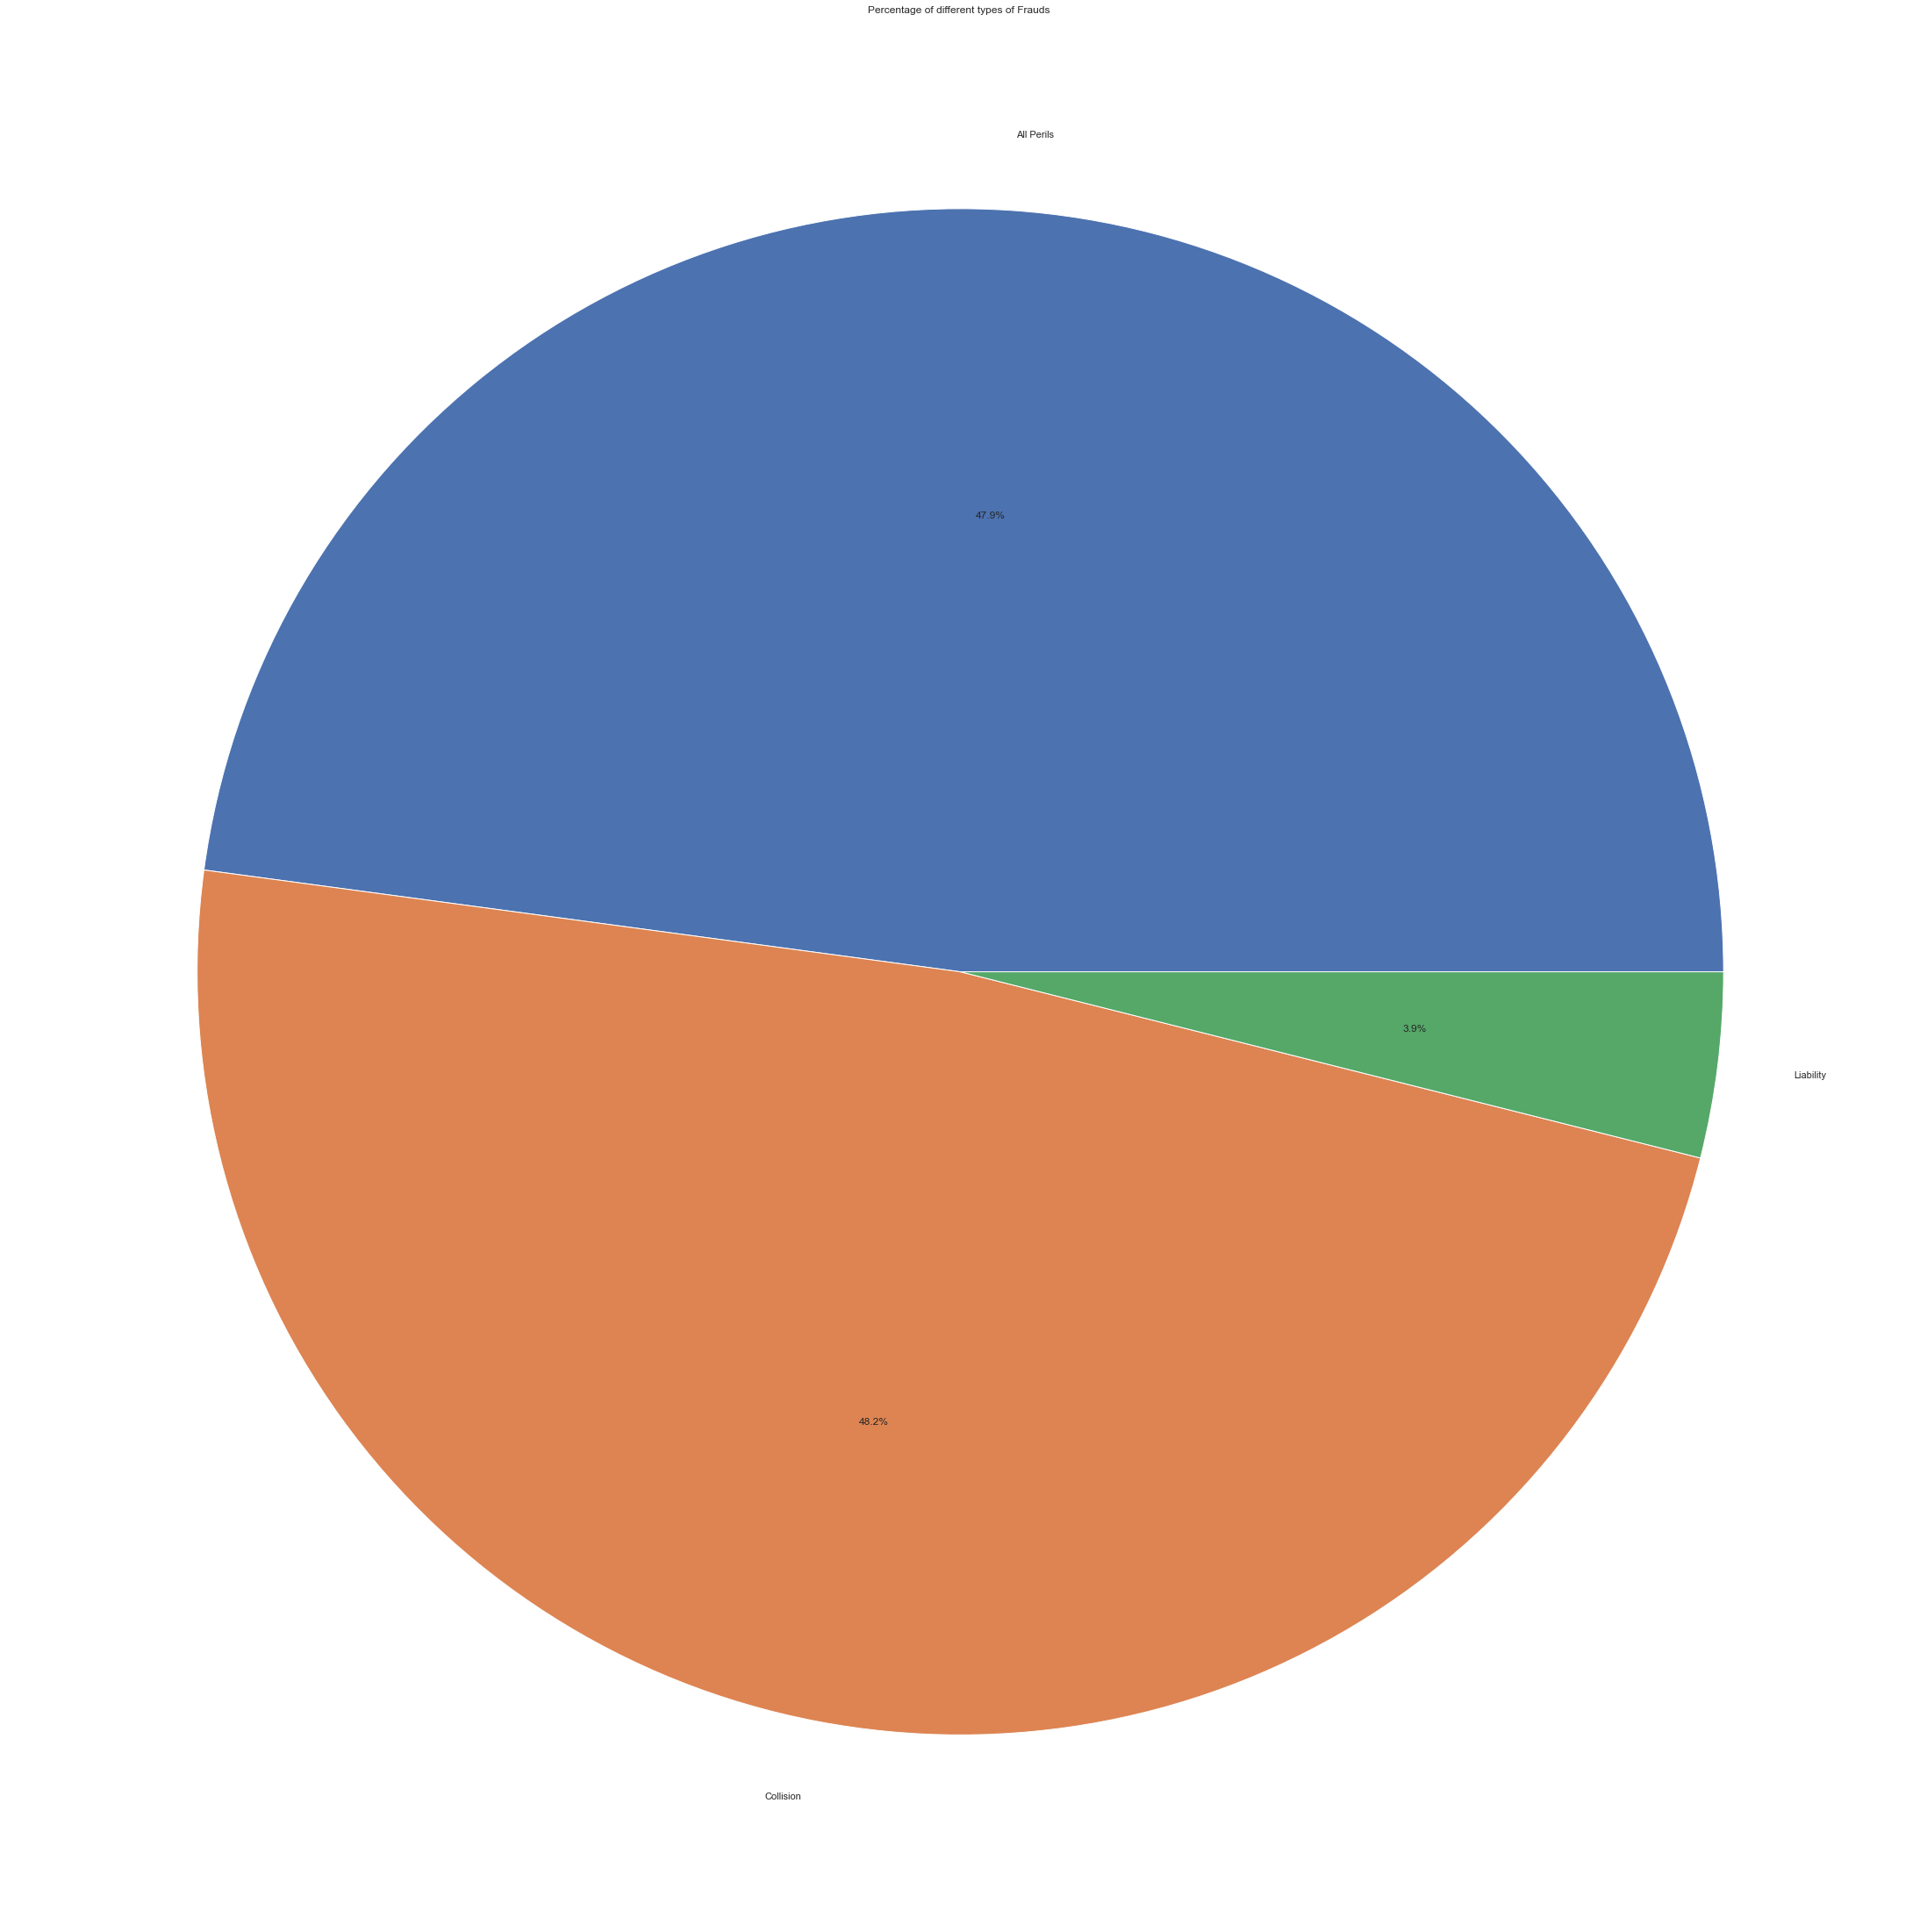

In [50]:
policy_coverage_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['BasePolicy'])
policy_coverage_fraud_rates = pd.DataFrame(policy_coverage_frauds.sum()/policy_coverage_frauds.count()).reset_index()
display(policy_coverage_fraud_rates.style.format({'FraudFound_P':'{:,.2%}'}))
policy_coverage_frauds = pd.DataFrame(policy_coverage_frauds.sum())
policy_coverage_frauds.reset_index(inplace=True)
plt.pie(policy_coverage_frauds['FraudFound_P'], labels=policy_coverage_frauds['BasePolicy'], autopct="%1.1f%%")
plt.title('Percentage of different types of Frauds ')
plt.show()

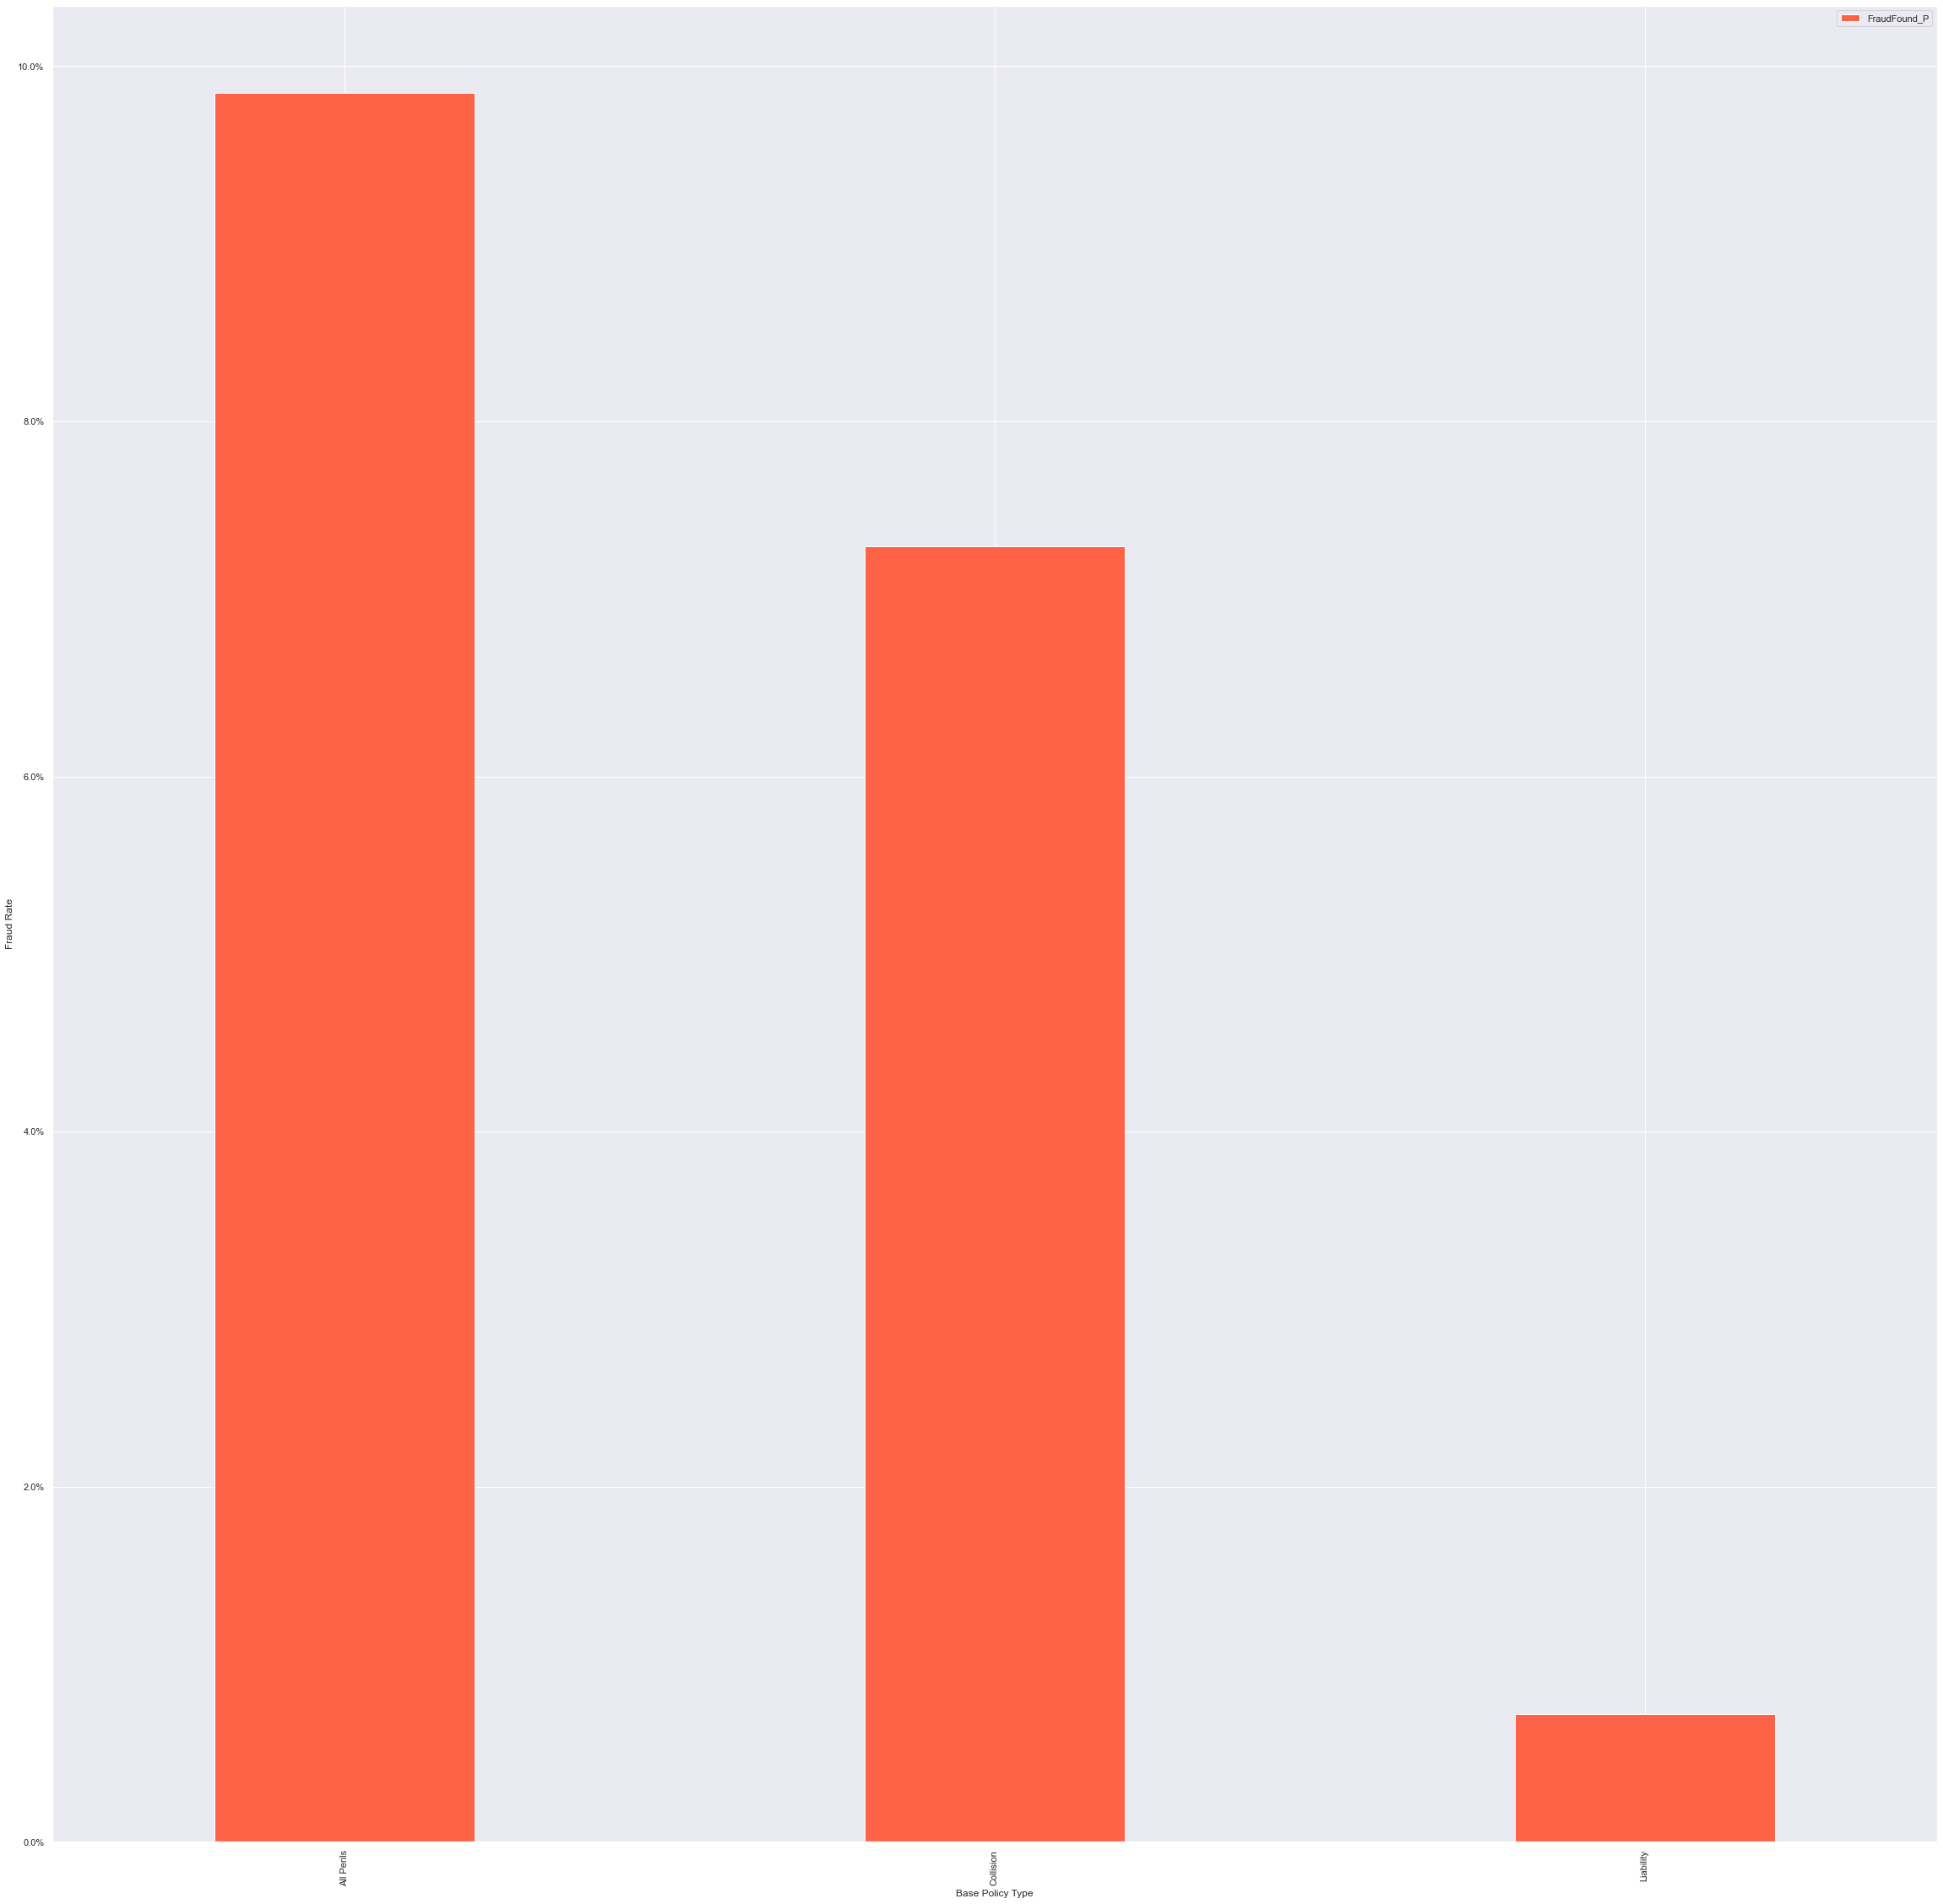

In [51]:
policy_coverage_fraud_rates.plot.bar(x='BasePolicy', color='tomato', width=0.4)
plt.xlabel('Base Policy Type')
plt.ylabel('Fraud Rate')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.show()


# Frauds based on Policy Coverage and Deductible

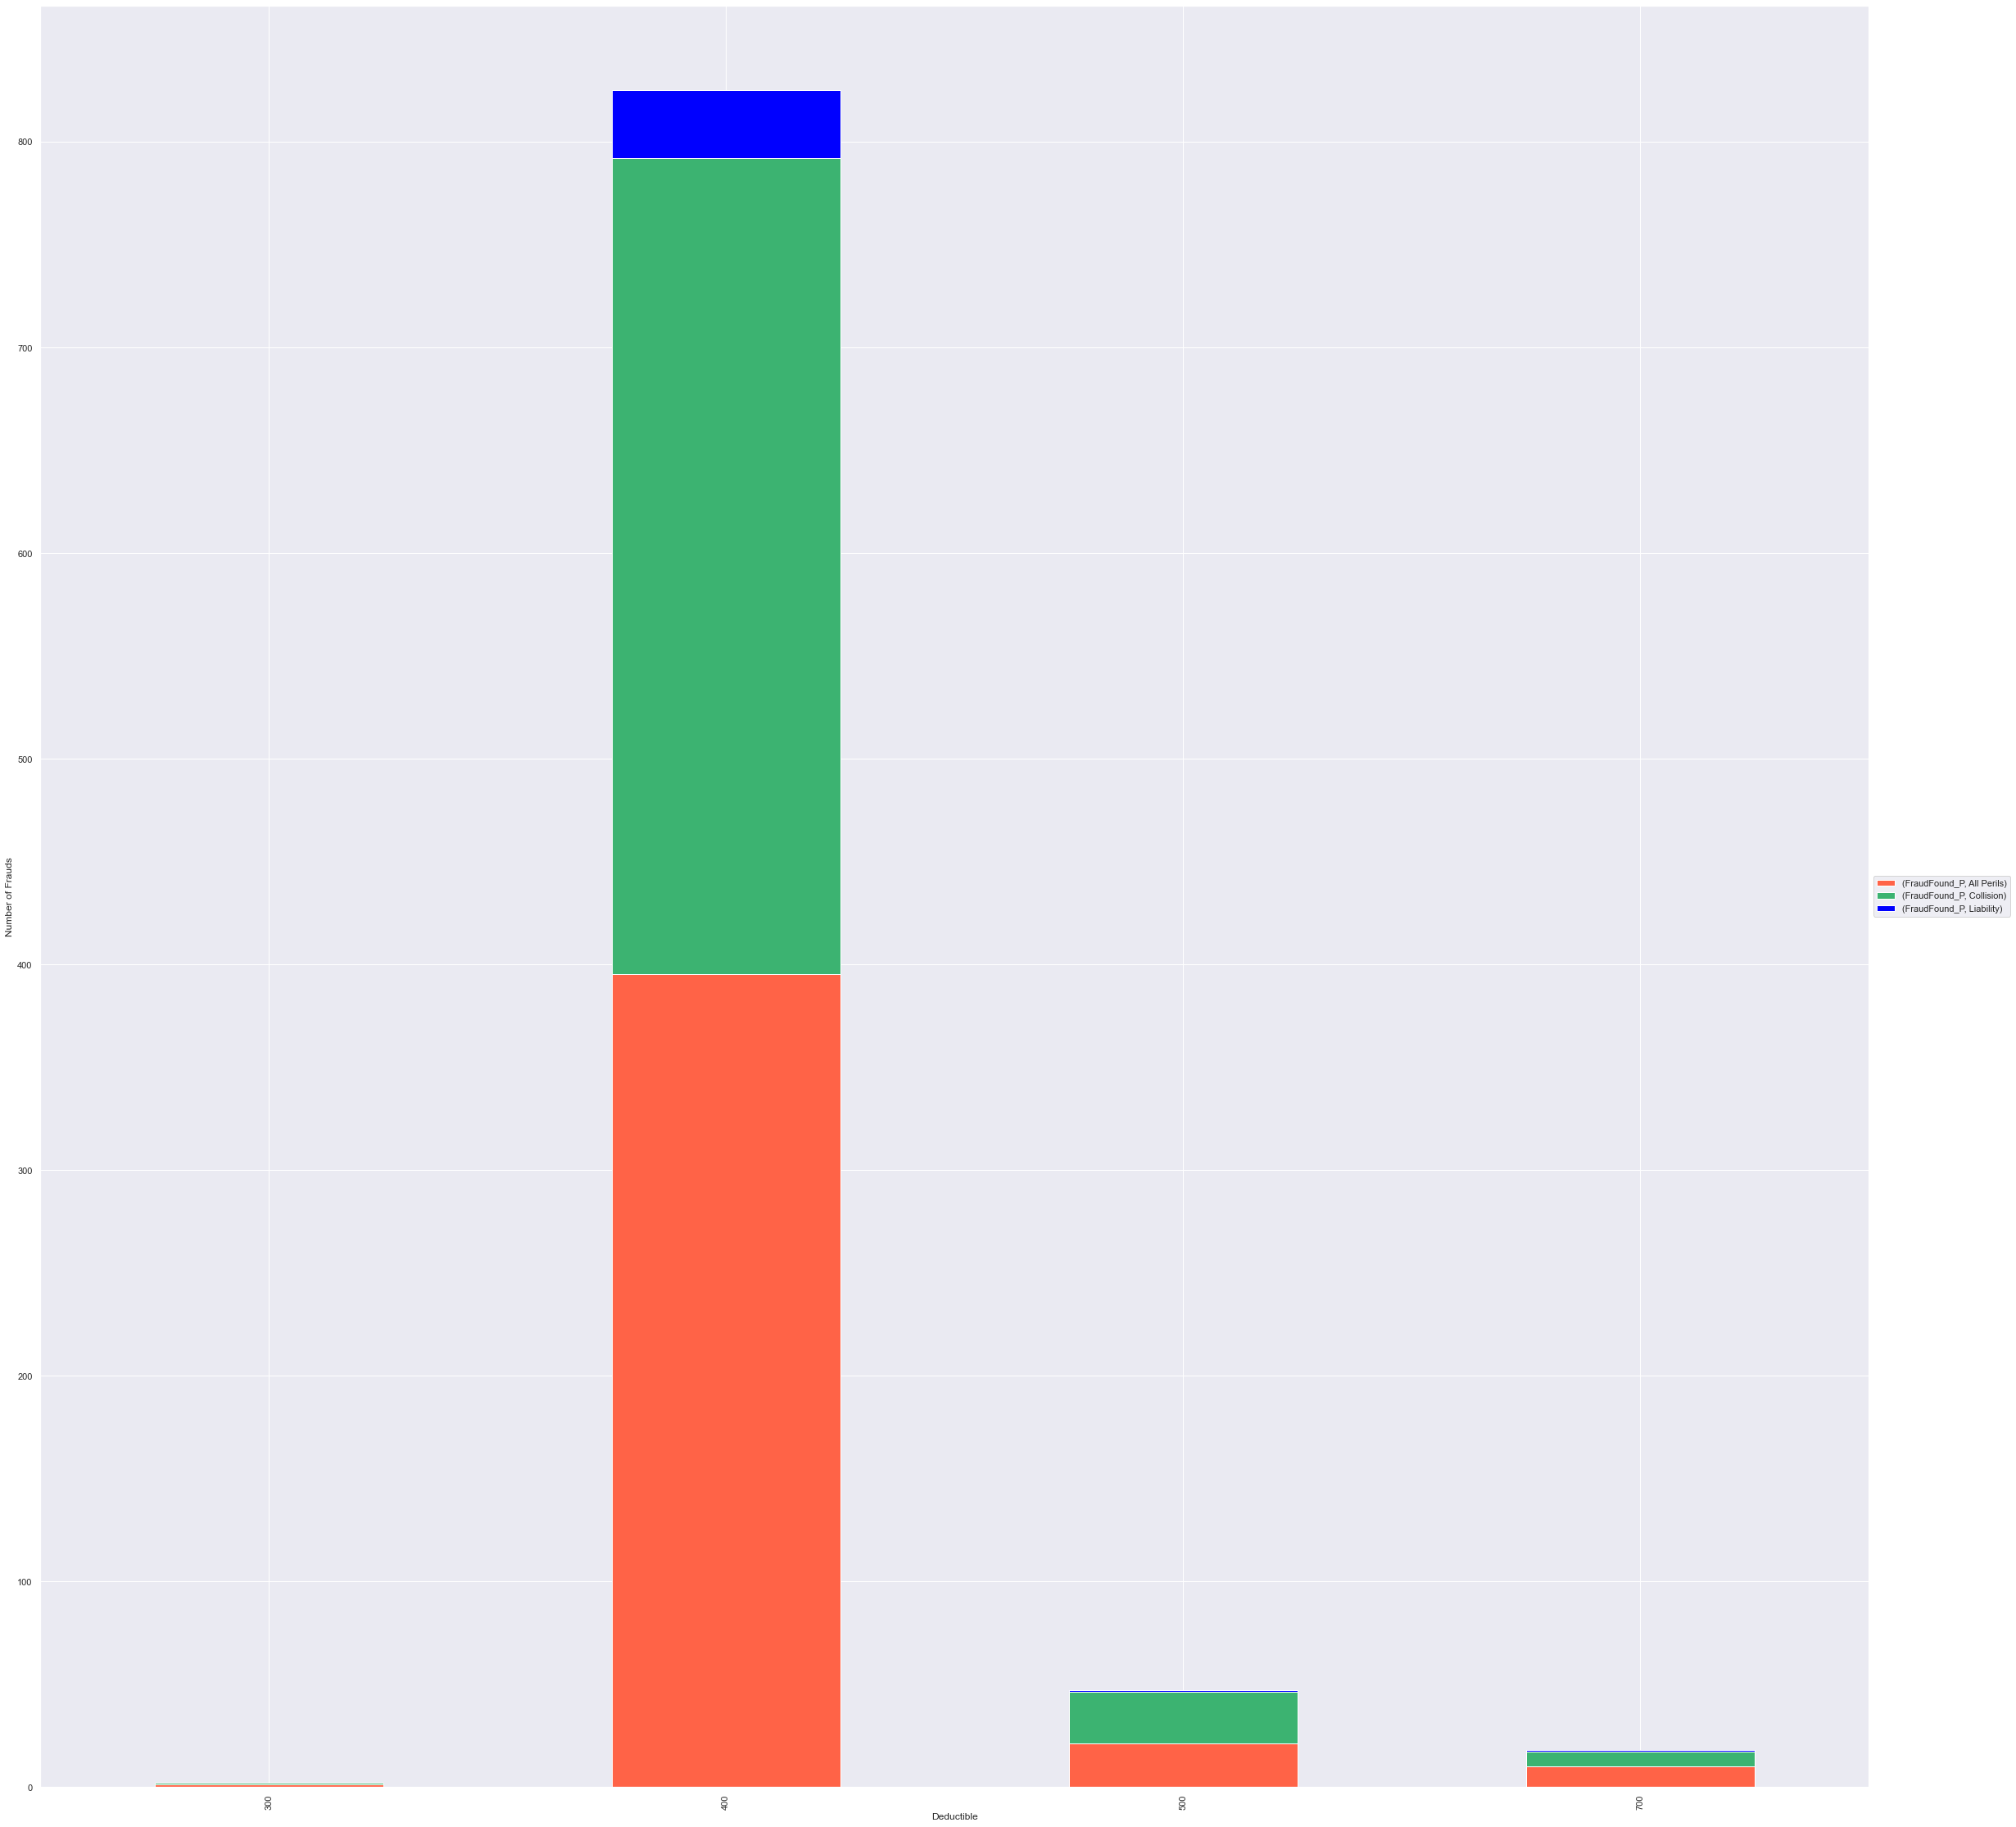

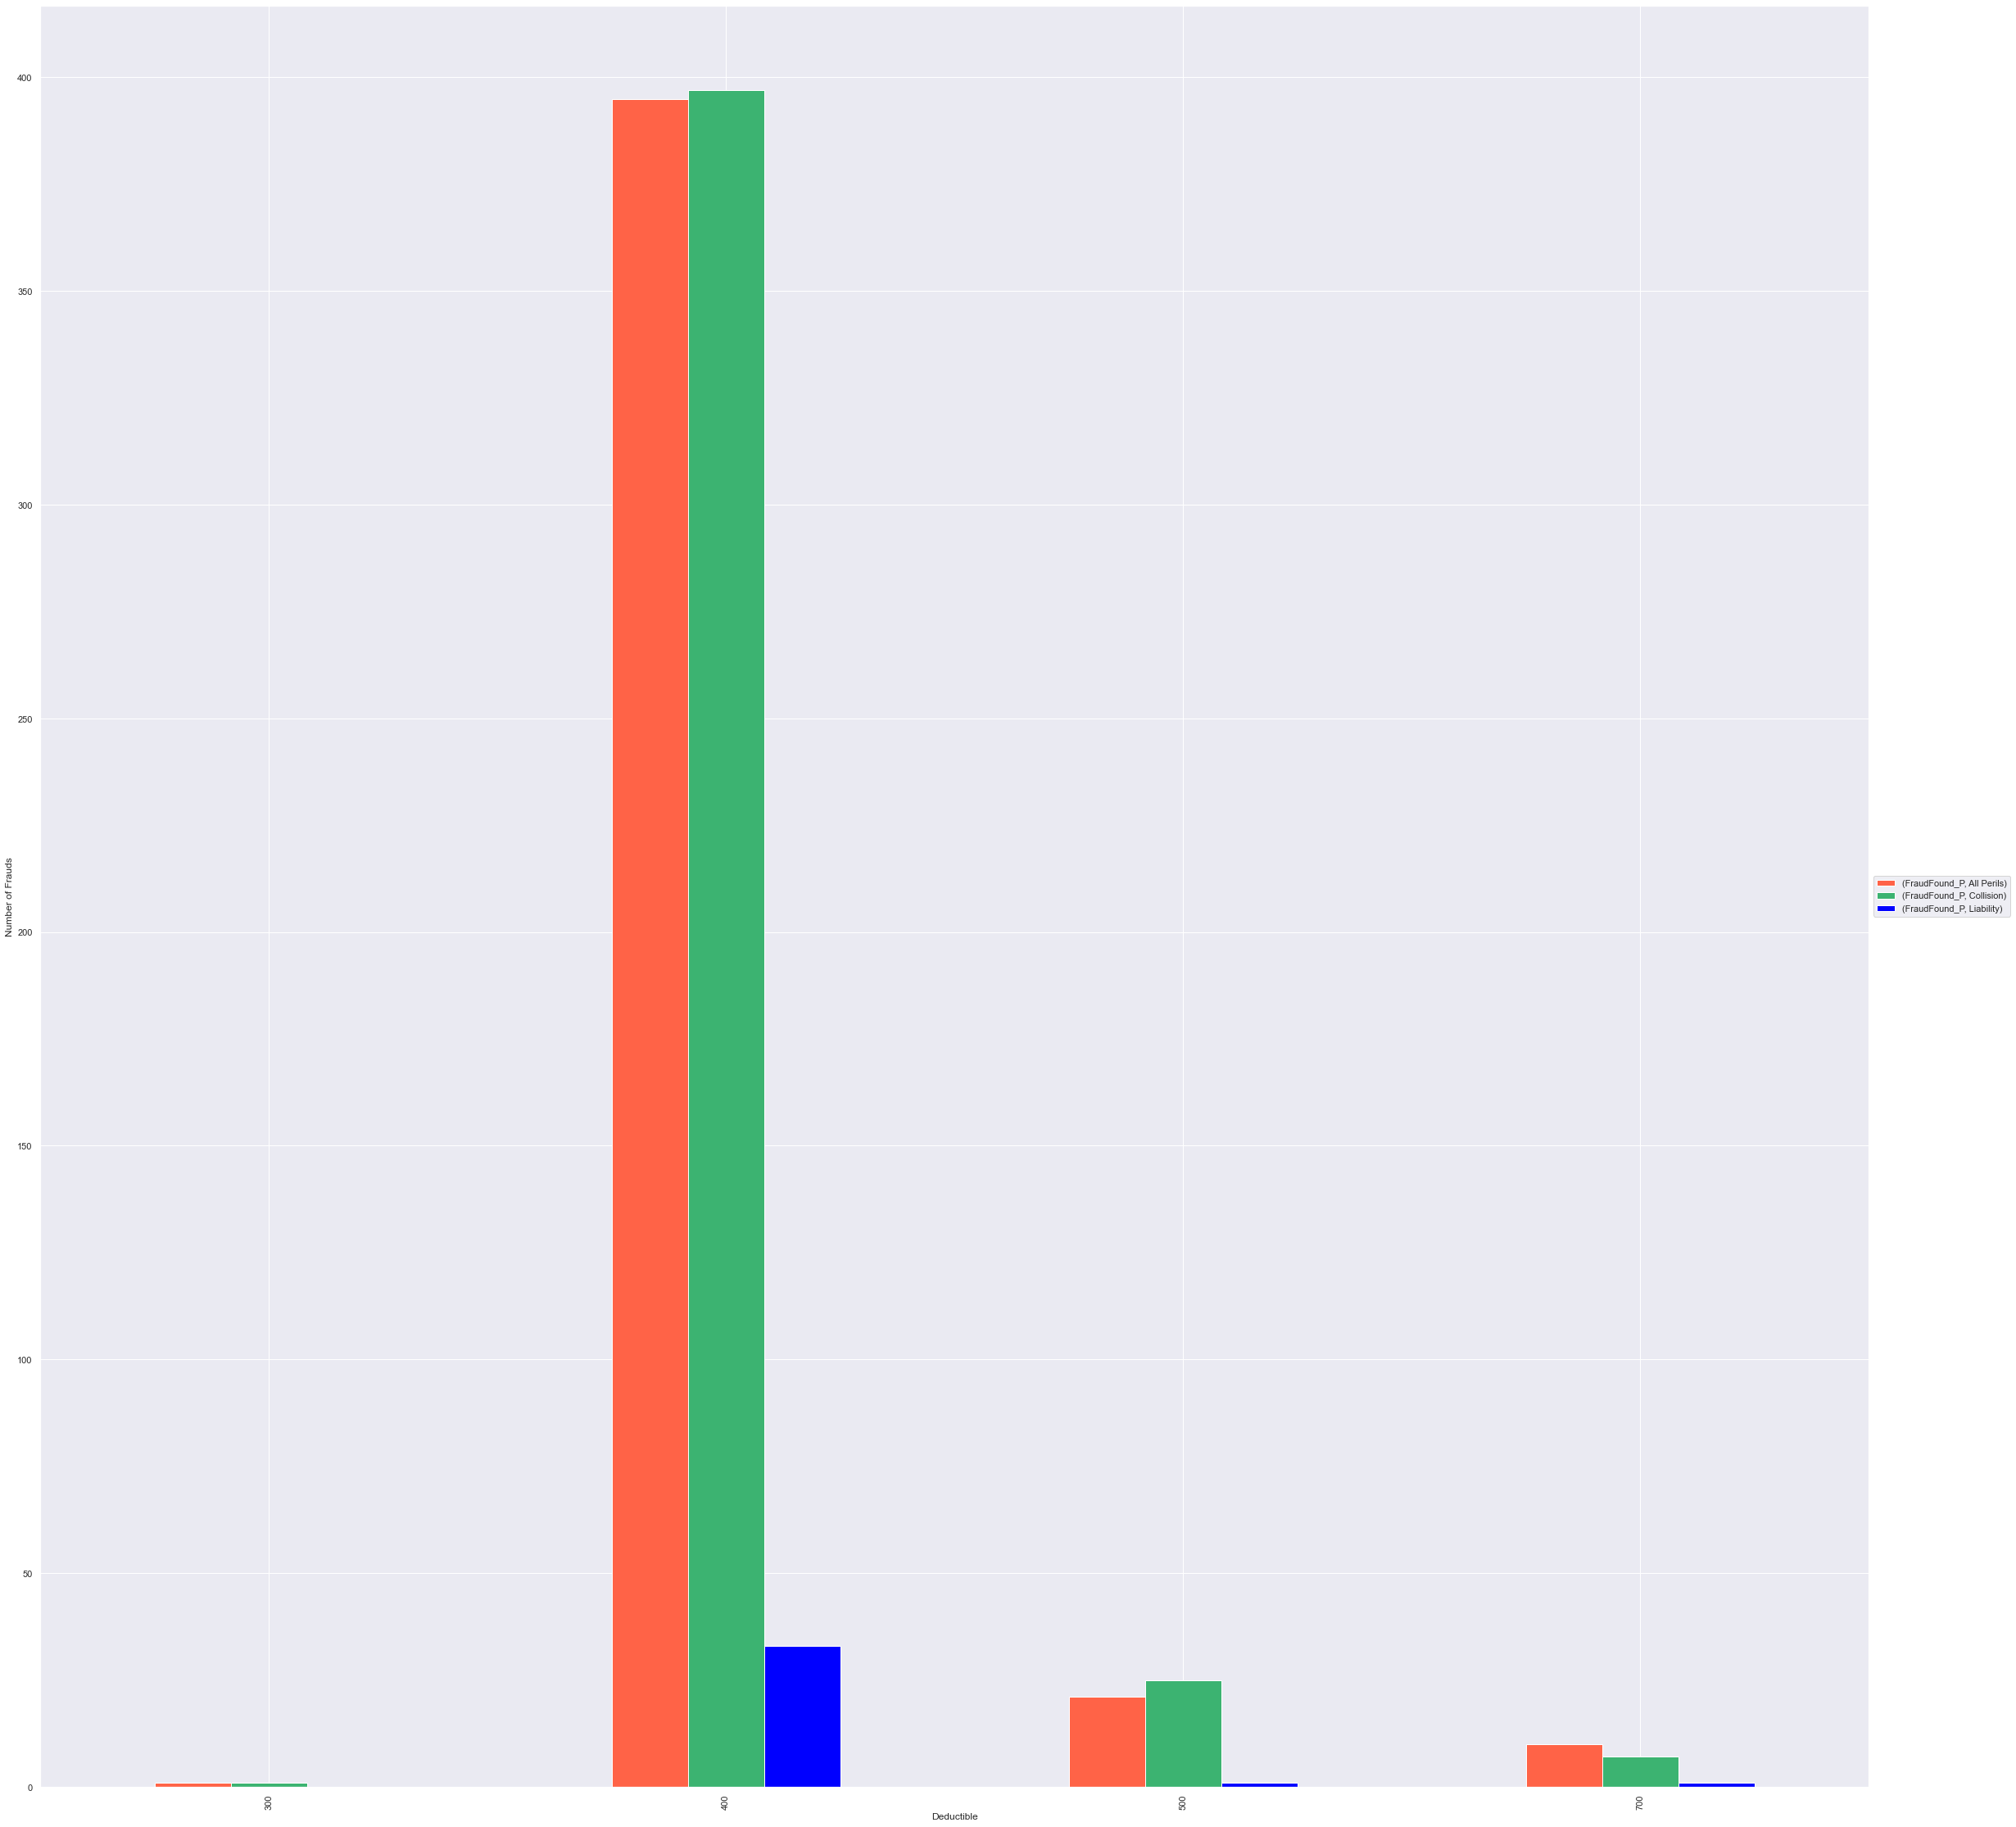

In [52]:
coverage_and_deductible_frauds = fraud_data[['FraudFound_P','Deductible','BasePolicy']].groupby(['Deductible','BasePolicy'])
coverage_and_deductible_frauds = coverage_and_deductible_frauds.sum().unstack()
coverage_and_deductible_frauds.reset_index(inplace=True)
coverage_and_deductible_frauds.plot.bar(x='Deductible', stacked=True, color=['tomato','mediumseagreen','blue'])
plt.legend(loc='center left', bbox_to_anchor=[1,0.5])
plt.ylabel('Number of Frauds')
plt.show()


coverage_and_deductible_frauds = coverage_and_deductible_frauds.set_index('Deductible')
coverage_and_deductible_frauds.plot(kind='bar', color=['tomato','mediumseagreen','blue'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Number of Frauds')
plt.show()


# Frauds based on Driver Rating

In [53]:
driver_rating_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['DriverRating'])
driver_rating_fraud_rate = pd.DataFrame(driver_rating_frauds.sum()/driver_rating_frauds.count()).reset_index()
display(driver_rating_fraud_rate.style.format({'FraudFound_P':'{:,.2%}'}))
driver_rating_frauds = pd.DataFrame(driver_rating_frauds.sum()).reset_index()
driver_rating_frauds

,DriverRating,FraudFound_P
0,1,5.79%
1,2,5.59%
2,3,6.20%
3,4,6.04%


,DriverRating,FraudFound_P
0,1,224
1,2,208
2,3,235
3,4,225


# Frauds based on Witness Presence at Time of Accident 

  WitnessPresent  FraudFound_P
0             No           889
1            Yes             3


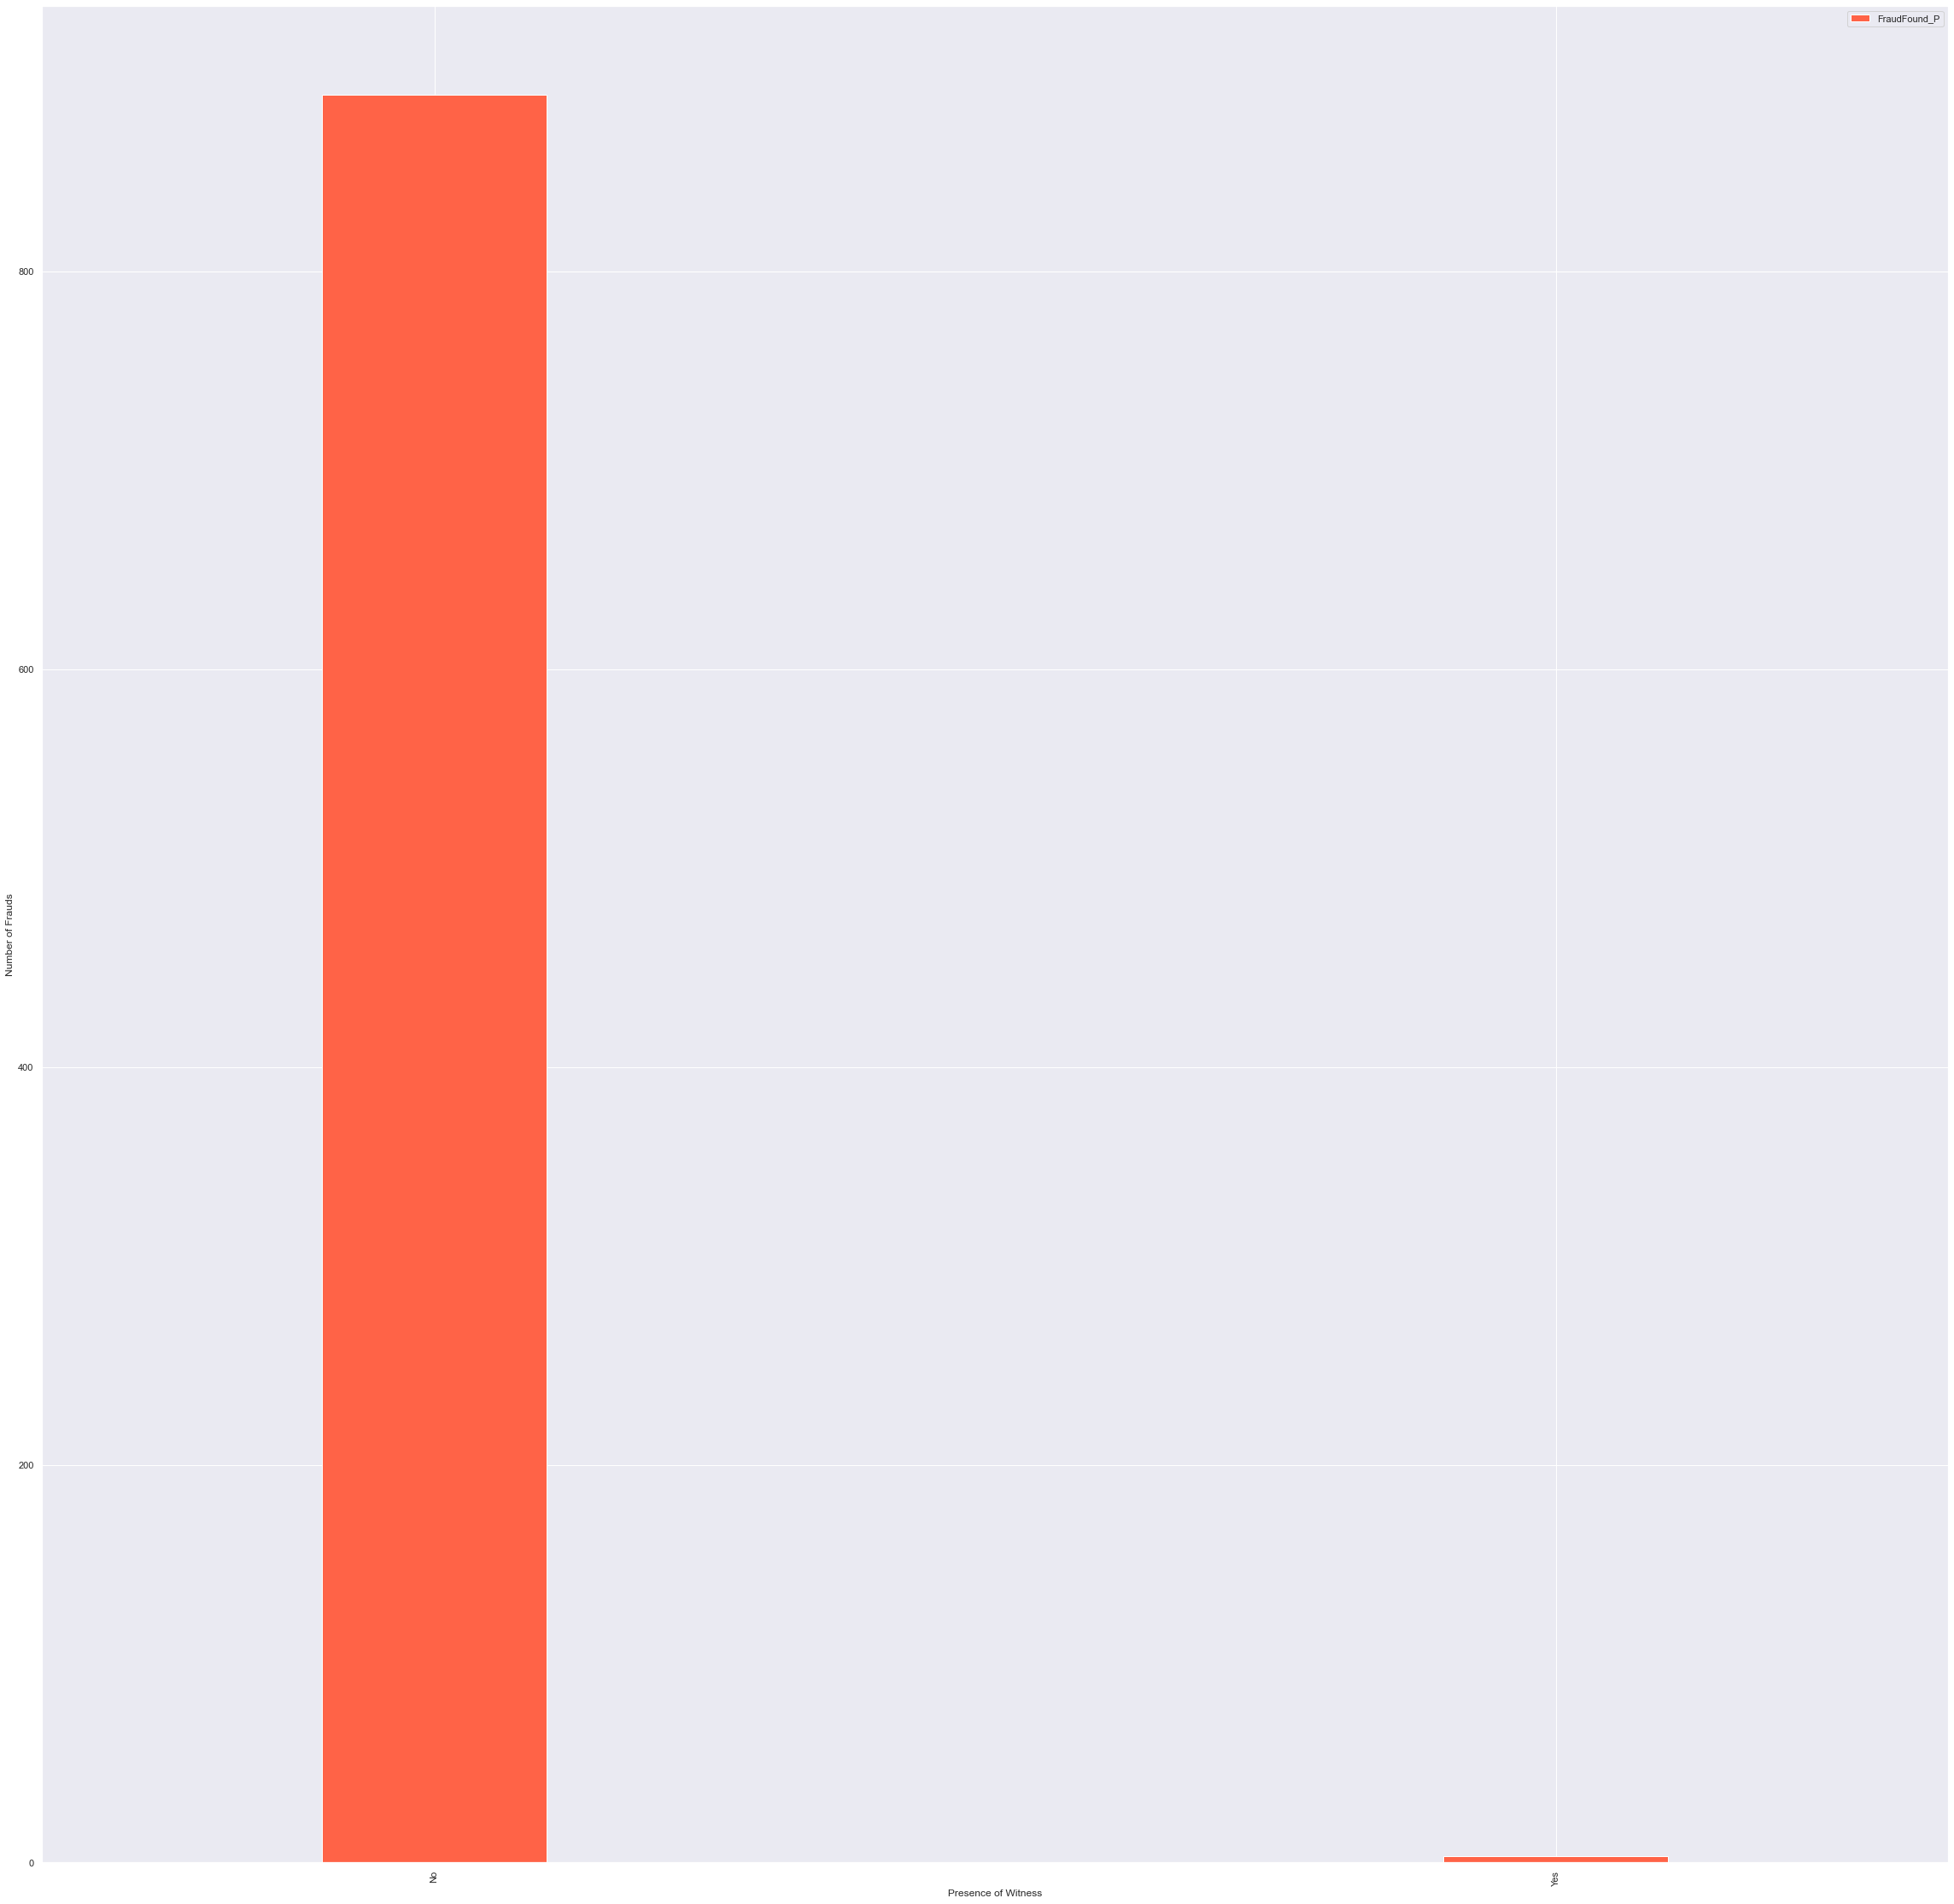

In [54]:
witness_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['WitnessPresent'])
witness_frauds = pd.DataFrame(witness_frauds.sum()).reset_index()
print(witness_frauds)
witness_frauds.plot.bar(x='WitnessPresent', color='tomato', width=0.2)
plt.ylabel('Number of Frauds')
plt.xlabel('Presence of Witness')
plt.show()

# Frauds based on Number of Claims

In [55]:
previous_claims_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['PastNumberOfClaims'])
previous_claims_frauds = pd.DataFrame(previous_claims_frauds.sum()/previous_claims_frauds.count()*100).reset_index()
previous_claims_frauds

,PastNumberOfClaims,FraudFound_P
0,1,6.184098
1,2 to 4,5.392339
2,more than 4,3.350254
3,none,7.518265


# Frauds based on Month of Claim

In [56]:
month_of_claim_frauds = fraud_data['FraudFound_P'].groupby(fraud_data['Month'])
month_of_claim_total_claims = pd.DataFrame(month_of_claim_frauds.count())
month_of_claim_total_claims.rename(columns={'FraudFound_P':'Total Claims'},inplace=True)
month_of_claim_frauds = pd.DataFrame(month_of_claim_frauds.sum())
month_of_claim_frauds.rename(columns={'FraudFound_P':'Fraud Claims'}, inplace=True)

In [57]:
monthly_claims = pd.concat([month_of_claim_total_claims,month_of_claim_frauds], axis=1, join='inner')
monthly_claims.reset_index(inplace=True)
monthly_claims

,Month,Total Claims,Fraud Claims
0,Apr,1235,74
1,Aug,1122,83
2,Dec,1259,59
3,Feb,1219,77
4,Jan,1352,84
5,Jul,1241,58
6,Jun,1297,78
7,Mar,1313,96
8,May,1336,91
9,Nov,1190,46


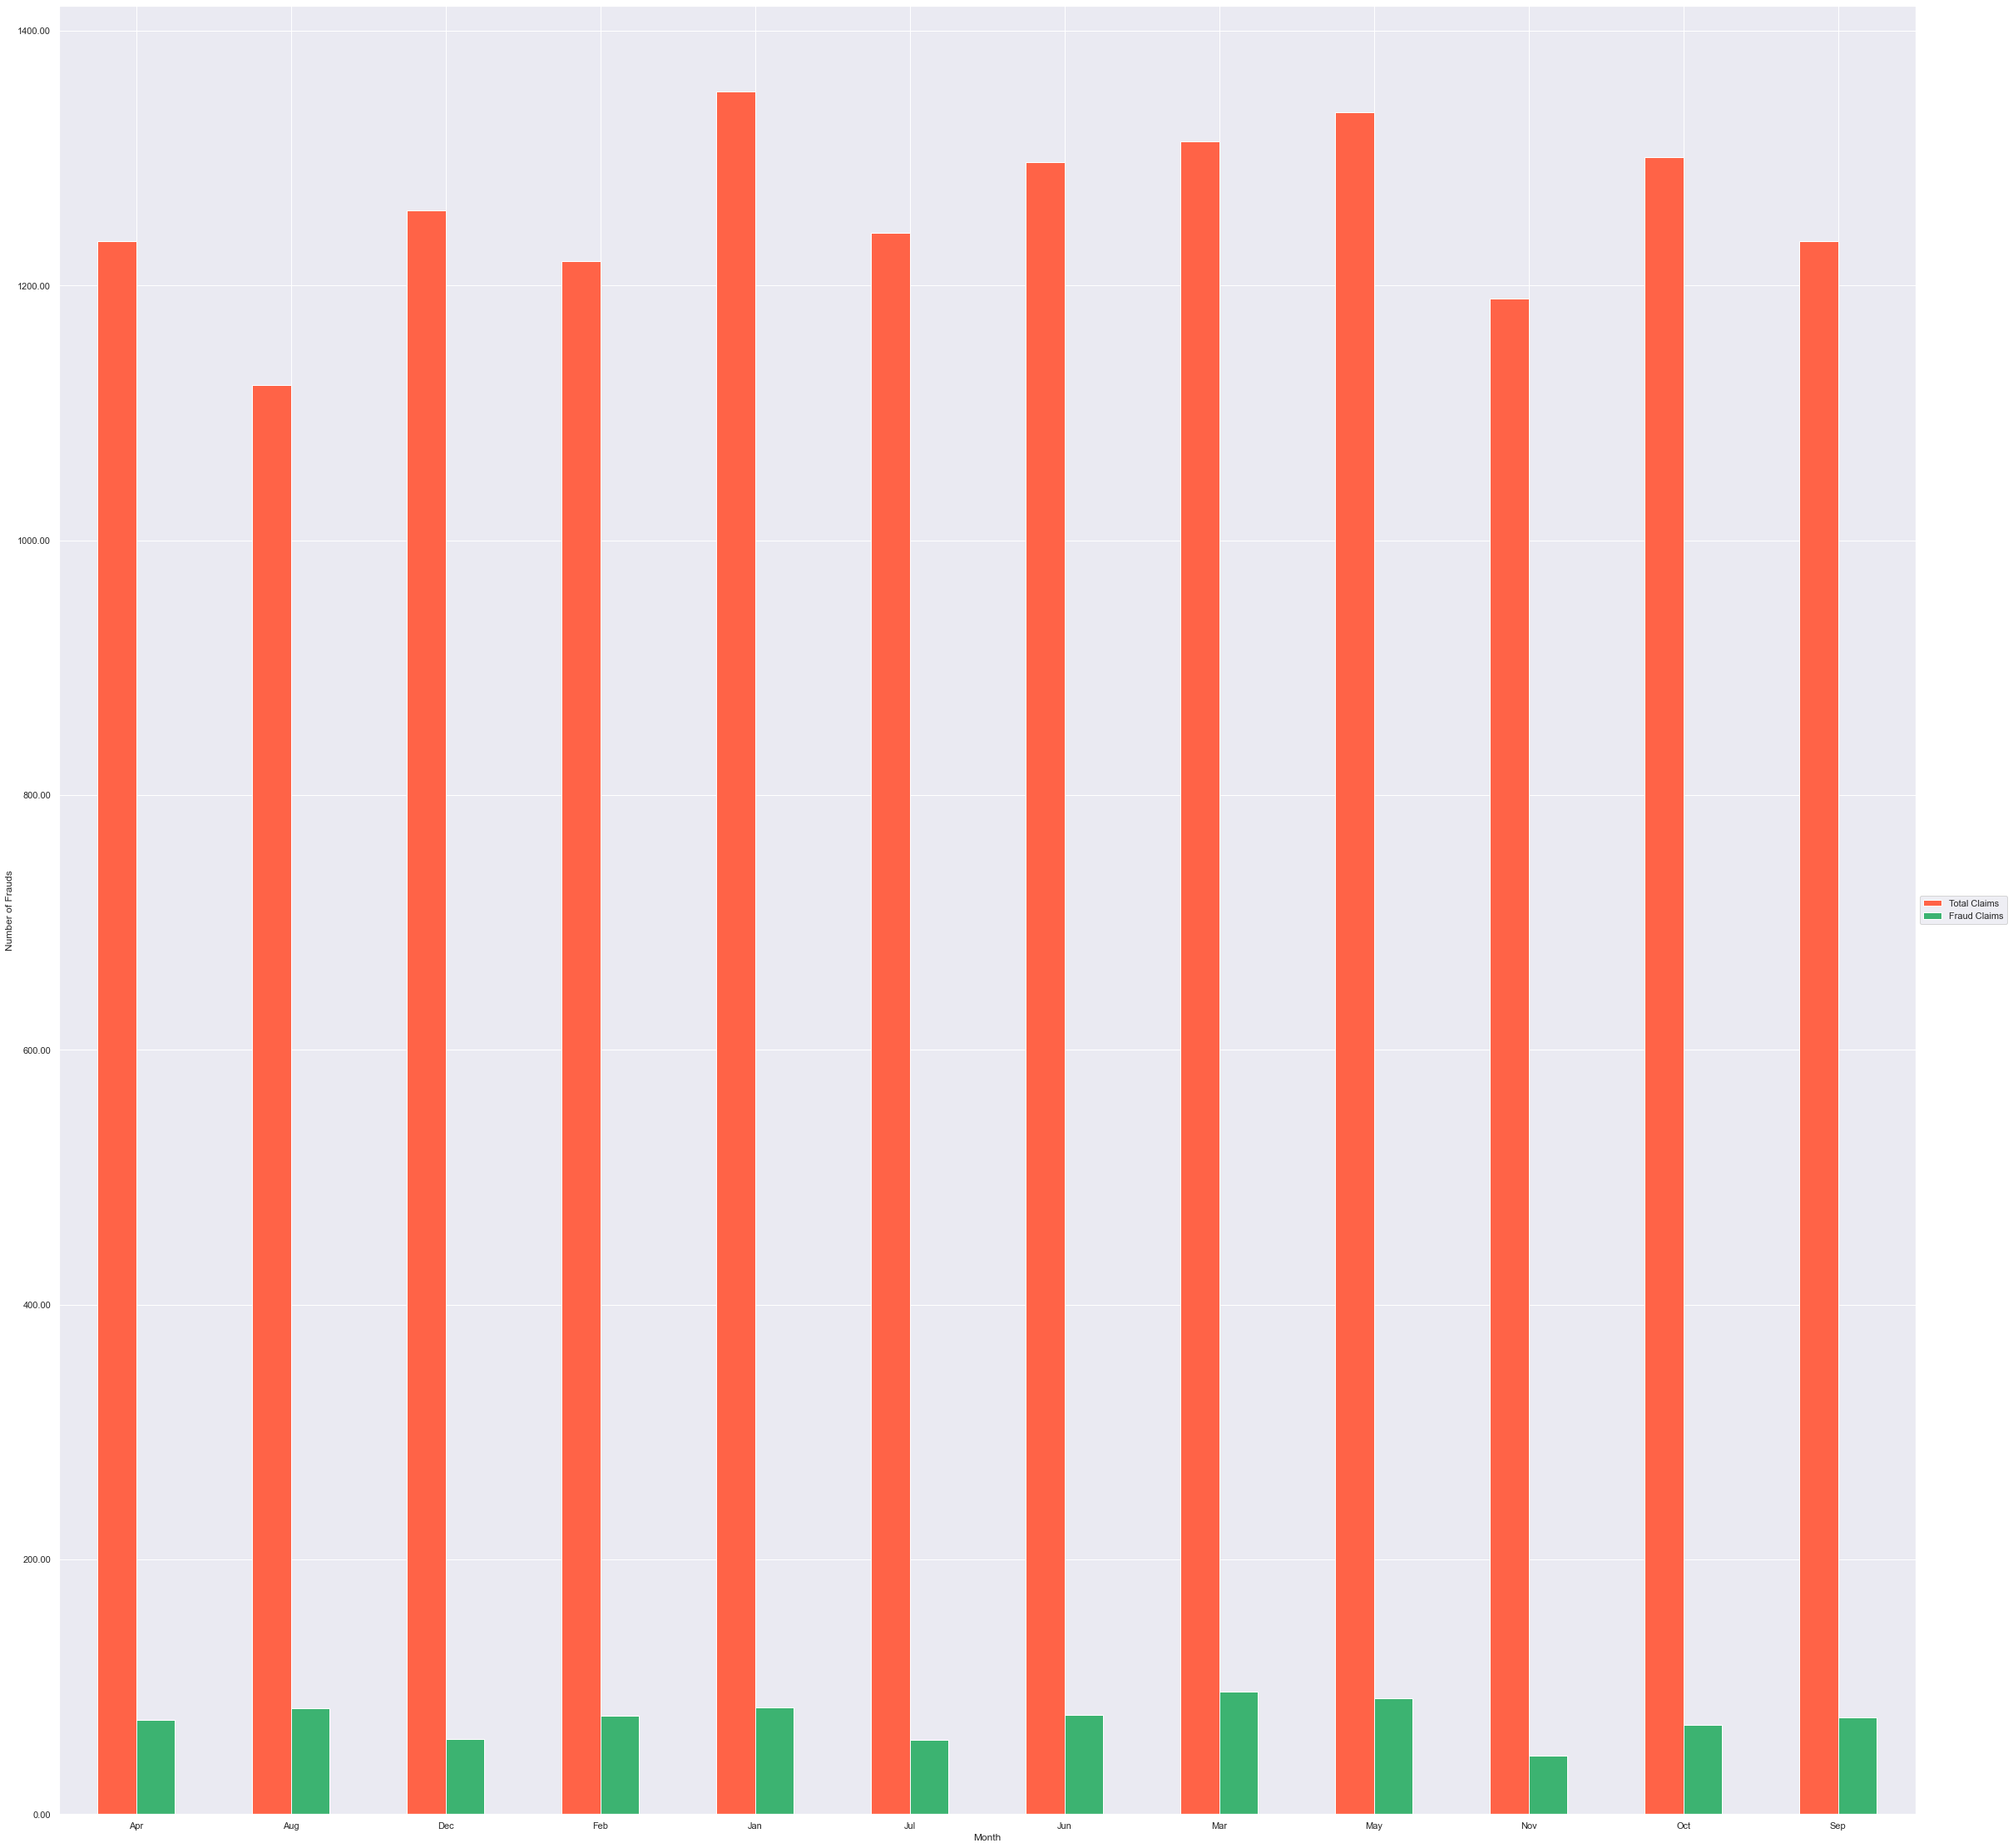

In [58]:
monthly_claims.plot(kind='bar', color=['tomato','mediumseagreen'])
plt.ylabel('Number of Frauds')
plt.xlabel('Month')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.gca().xaxis.set_tick_params(rotation=0)
plt.xticks(np.arange(12), monthly_claims['Month'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [146]:
agevagesex = pd.DataFrame(fraudcases[['Age', 'AgeOfVehicle', 'Sex']].value_counts())
agevagesex.reset_index(inplace = True)
agevagesex = agevagesex.rename(columns = {0: "Count"})
agevagesex.head(10)

,Age,AgeOfVehicle,Sex,Count
0,32,6 years,Male,23
1,35,6 years,Male,21
2,30,6 years,Male,20
3,41,7 years,Male,19
4,35,7 years,Male,19
5,36,7 years,Male,18
6,39,7 years,Male,18
7,27,6 years,Male,16
8,31,6 years,Male,14
9,26,6 years,Male,14


In [151]:
summ = pd.DataFrame(fraudcases[['Age_Range', 'MaritalStatus', 'Sex', 'VehicleCategory', 'AgeOfVehicle', 'VehiclePrice', 'AccidentArea']].value_counts())
summ.reset_index(inplace = True)
summ = summ.rename(columns = {0: 'Count'})
summ.head(10)

,Age_Range,MaritalStatus,Sex,VehicleCategory,AgeOfVehicle,VehiclePrice,AccidentArea,Count
0,"(35, 45]",Married,Male,Sedan,7 years,20000 to 29000,Urban,46
1,"(25, 35]",Married,Male,Sedan,6 years,20000 to 29000,Urban,38
2,"(25, 35]",Single,Male,Sedan,6 years,20000 to 29000,Urban,33
3,"(25, 35]",Married,Male,Sedan,7 years,20000 to 29000,Urban,29
4,"(45, 55]",Married,Male,Sedan,more than 7,20000 to 29000,Urban,21
5,"(35, 45]",Married,Male,Sedan,7 years,30000 to 39000,Urban,18
6,"(25, 35]",Married,Male,Sedan,7 years,30000 to 39000,Urban,17
7,"(45, 55]",Married,Male,Sedan,more than 7,30000 to 39000,Urban,16
8,"(35, 45]",Married,Male,Sedan,more than 7,30000 to 39000,Urban,14
9,"(25, 35]",Single,Male,Sedan,6 years,30000 to 39000,Urban,13
